<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week43.do.txt --no_mako -->
<!-- dom:TITLE: Week 43: Deep Learning: Constructing a Neural Network code and solving differential equations -->

# Week 43: Deep Learning: Constructing a Neural Network code and solving differential equations
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University

Date: **Oct 23, 2023**

Copyright 1999-2023, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license

## Plans for week 43

**Material for the active learning sessions on Tuesday and Wednesday.**

  * Exercise on writing your own neural network code, application to the OR and XOR gates

  * The exercises this week will be continued next week as well

  * Discussion of project 2

  

**Material for the lecture on Thursday October 26, 2023.**

  * Building our own Feed-forward Neural Network and discussion of project 2, continuation from last week

  * Solving differential equations with Neural Networks and intro to **Tensorflow** with  examples.

  * Readings and Videos:

    * These lecture notes

    * [Aurelien Geron's chapters 10-11](https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/TensorflowML.pdf)

    * For a more in depth discussion on  neural networks we recommend Goodfellow et al chapters 6 and 7.     

    * [Neural Networks demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU&ab_channel=WelchLabs)

    * [Building Neural Networks from scratch](https://www.youtube.com/watch?v=Wo5dMEP_BbI&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&ab_channel=sentdex)

    * [Video on Neural Networks](https://www.youtube.com/watch?v=CqOfi41LfDw)

    * [Video on the back propagation algorithm](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

I also  recommend Michael Nielsen's intuitive approach to the neural networks and the universal approximation theorem, see the slides at <http://neuralnetworksanddeeplearning.com/chap4.html>.

## Using Automatic differentiation
a
In our discussions of ordinary differential equations 
we will also study the usage of [Autograd](https://www.youtube.com/watch?v=fRf4l5qaX1M&ab_channel=AlexSmola) in computing gradients for deep learning. For the documentation of Autograd and examples see the lectures slides from [week 39](https://compphysics.github.io/MachineLearning/doc/pub/week39/html/week39.html) and the [Autograd documentation](https://github.com/HIPS/autograd).
t

## Back propagation and automatic differentiation

For more details on the back propagation algorithm and automatic differentiation see
1. <https://www.jmlr.org/papers/volume18/17-468/17-468.pdf>

2. <https://deepimaging.github.io/lectures/lecture_11_Backpropagation.pdf>

3. Slides 12-44 at URL":http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture4.pdf"

## Material for exercises week 43 and week 44

## Writing our first neural network code,  testing it  for the OR and XOR gates

During week 41 we discussed three different types of gates, the
so-called XOR, the OR and the AND gates.  In order to develop a code
for neural networks, it can be useful to set up a simpler system with
only two inputs and one output. This can make it easier to debug and
study the feed forward pass and the back propagation part. In the
exercise this and next week, we propose to study this system with just
one hidden layer and two hidden nodes. There is only one output node
and we can choose to use either a simple regression case (fitting a
line) or just a binary classification case with the corss-entropy as
cost function.

Their inputs and outputs can be
summarized using the following tables, first for the OR gate with
inputs $x_1$ and $x_2$ and outputs $y$:

<table class="dotable" border="1">
<thead>
<tr><th align="center">$x_1$</th> <th align="center">$x_2$</th> <th align="center">$y$</th> </tr>
</thead>
<tbody>
<tr><td align="center">   0        </td> <td align="center">   0        </td> <td align="center">   0      </td> </tr>
<tr><td align="center">   0        </td> <td align="center">   1        </td> <td align="center">   1      </td> </tr>
<tr><td align="center">   1        </td> <td align="center">   0        </td> <td align="center">   1      </td> </tr>
<tr><td align="center">   1        </td> <td align="center">   1        </td> <td align="center">   1      </td> </tr>
</tbody>
</table>

## The AND and XOR Gates

The AND gate is defined as

<table class="dotable" border="1">
<thead>
<tr><th align="center">$x_1$</th> <th align="center">$x_2$</th> <th align="center">$y$</th> </tr>
</thead>
<tbody>
<tr><td align="center">   0        </td> <td align="center">   0        </td> <td align="center">   0      </td> </tr>
<tr><td align="center">   0        </td> <td align="center">   1        </td> <td align="center">   0      </td> </tr>
<tr><td align="center">   1        </td> <td align="center">   0        </td> <td align="center">   0      </td> </tr>
<tr><td align="center">   1        </td> <td align="center">   1        </td> <td align="center">   1      </td> </tr>
</tbody>
</table>

And finally we have the XOR gate

<table class="dotable" border="1">
<thead>
<tr><th align="center">$x_1$</th> <th align="center">$x_2$</th> <th align="center">$y$</th> </tr>
</thead>
<tbody>
<tr><td align="center">   0        </td> <td align="center">   0        </td> <td align="center">   0      </td> </tr>
<tr><td align="center">   0        </td> <td align="center">   1        </td> <td align="center">   1      </td> </tr>
<tr><td align="center">   1        </td> <td align="center">   0        </td> <td align="center">   1      </td> </tr>
<tr><td align="center">   1        </td> <td align="center">   1        </td> <td align="center">   0      </td> </tr>
</tbody>
</table>

## Representing the Data Sets

Our design matrix is defined by the input values $x_1$ and $x_2$. Since we have four possible outputs, our design matrix reads

$$
\boldsymbol{X}=\begin{bmatrix} 0 & 0 \\
                       0 & 1 \\
		       1 & 0 \\
		       1 & 1 \end{bmatrix},
$$

while the vector of outputs is $\boldsymbol{y}^T=[0,1,1,0]$ for the XOR gate, $\boldsymbol{y}^T=[0,0,0,1]$ for the AND gate and $\boldsymbol{y}^T=[0,1,1,1]$ for the OR gate.

## Setting up the Neural Network

We define first our design matrix and the various output vectors for the different gates.

In [13]:
X = np.array([ [0, 0], [0, 1], [1, 0],[1, 1]],dtype=np.float64)
X.shape

(4, 2)

In [14]:
%matplotlib inline

"""
Simple code that tests XOR, OR and AND gates with linear regression
"""

# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def feed_forward(X):
    # weighted sum of inputs to the hidden layer
    z_h = np.matmul(X, hidden_weights) + hidden_bias
    # activation in the hidden layer
    a_h = sigmoid(z_h)
    
    # weighted sum of inputs to the output layer
    z_o = np.matmul(a_h, output_weights) + output_bias
    # softmax output
    # axis 0 holds each input and axis 1 the probabilities of each category
    probabilities = sigmoid(z_o)
    print(z_o.shape, probabilities.shape)
    return probabilities

# we obtain a prediction by taking the class with the highest likelihood
def predict(X):
    probabilities = feed_forward(X)
    return np.argmax(probabilities, axis=1)

# ensure the same random numbers appear every time
np.random.seed(0)

# Design matrix
X = np.array([ [0, 0], [0, 1], [1, 0],[1, 1]],dtype=np.float64)

# The XOR gate
yXOR = np.array( [ 0, 1 ,1, 0])
# The OR gate
yOR = np.array( [ 0, 1 ,1, 1])
# The AND gate
yAND = np.array( [ 0, 0 ,0, 1])

# Defining the neural network
n_inputs, n_features = X.shape
n_hidden_neurons = 2
n_categories = 2
n_features = 2

# we make the weights normally distributed using numpy.random.randn

# weights and bias in the hidden layer
hidden_weights = np.random.randn(n_features, n_hidden_neurons)
hidden_bias = np.zeros(n_hidden_neurons) + 0.01
print(hidden_weights.shape, hidden_bias.shape)

# weights and bias in the output layer
output_weights = np.random.randn(n_hidden_neurons, n_categories)
output_bias = np.zeros(n_categories) + 0.01
print(output_weights.shape, output_bias.shape)

probabilities = feed_forward(X)
print(probabilities)


predictions = predict(X)
print(predictions)

(2, 2) (2,)
(2, 2) (2,)
(4, 2) (4, 2)
[[0.80625657 0.36420967]
 [0.90297441 0.30170017]
 [0.89823921 0.28566769]
 [0.93420126 0.25920793]]
(4, 2) (4, 2)
[0 0 0 0]


Not an impressive result, but this was our first forward pass with randomly assigned weights. Let us now add the full network with the back-propagation algorithm discussed above.

## The Code using Scikit-Learn

Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on data set:  0.5

Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on data set:  0.5

Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on data set:  0.5

Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on data set:  0.5

Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on data set:  0.5

Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on data set:  0.5

Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on data set:  0.5

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on data set:  0.5

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on data set:  0.5

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on data set:  0.5

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on data set:  0.5

Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on data set:  0.5

Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on data set:  0.5

Learning rate  =  0.0001
Lambda =  10.0
A

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multi

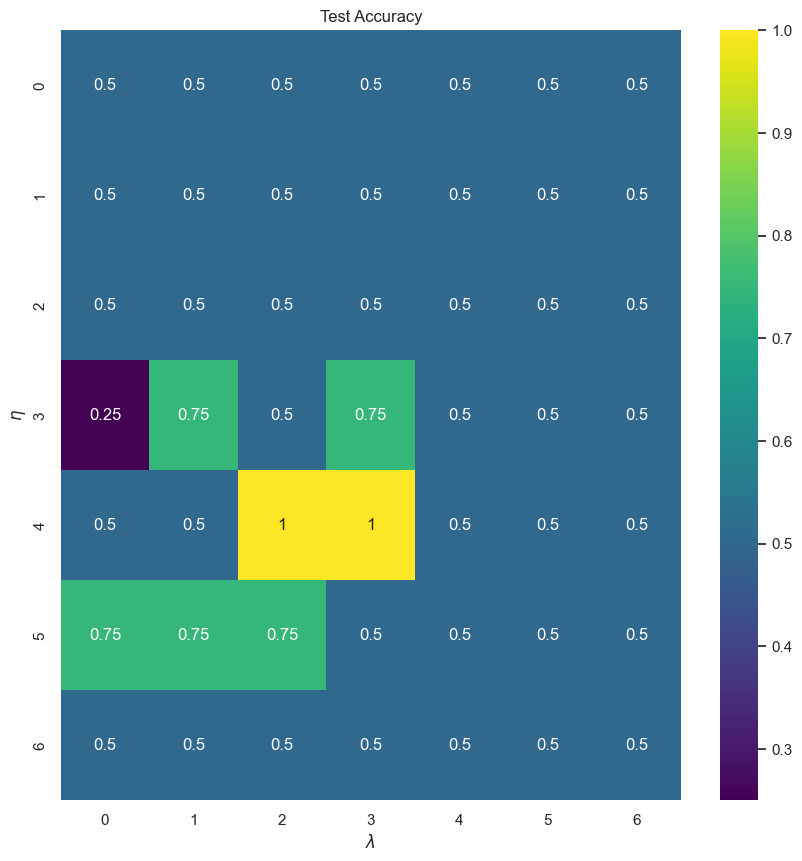

In [15]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# ensure the same random numbers appear every time
np.random.seed(0)

# Design matrix
X = np.array([ [0, 0], [0, 1], [1, 0],[1, 1]],dtype=np.float64)

# The XOR gate
yXOR = np.array( [ 0, 1 ,1, 0])
# The OR gate
yOR = np.array( [ 0, 1 ,1, 1])
# The AND gate
yAND = np.array( [ 0, 0 ,0, 1])

# Defining the neural network
n_inputs, n_features = X.shape
n_hidden_neurons = 2
n_categories = 2
n_features = 2

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
epochs = 100

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X, yXOR)
        DNN_scikit[i][j] = dnn
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on data set: ", dnn.score(X, yXOR))
        print()

sns.set()
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        test_pred = dnn.predict(X)
        test_accuracy[i][j] = accuracy_score(yXOR, test_pred)

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

How do we interpret these results?

## Lecture Thursday October 26

## Developing a code for doing neural networks with back propagation

We repeat some of the elements discussed last week. The first part of
the material for Thursday was contained in the slides for last
week as well. We will repeat some of the topics here before we move into
applications to differential equations and other examples.

One can identify a set of key steps when using neural networks to solve supervised learning problems:  

1. Collect and pre-process data  

2. Define model and architecture  

3. Choose cost function and optimizer  

4. Train the model  

5. Evaluate model performance on test data  

6. Adjust hyperparameters (if necessary, network architecture)

## Collect and pre-process data

Here we will be using the MNIST dataset, which is readily available through the **scikit-learn**
package. You may also find it for example [here](http://yann.lecun.com/exdb/mnist/).  
The *MNIST* (Modified National Institute of Standards and Technology) database is a large database
of handwritten digits that is commonly used for training various image processing systems.  
The MNIST dataset consists of 70 000 images of size $28\times 28$ pixels, each labeled from 0 to 9.  
The scikit-learn dataset we will use consists of a selection of 1797 images of size $8\times 8$ collected and processed from this database.  

To feed data into a feed-forward neural network we need to represent
the inputs as a design/feature matrix $X = (n_{inputs}, n_{features})$.  Each
row represents an *input*, in this case a handwritten digit, and
each column represents a *feature*, in this case a pixel.  The
correct answers, also known as *labels* or *targets* are
represented as a 1D array of integers 
$Y = (n_{inputs}) = (5, 3, 1, 8,...)$.

As an example, say we want to build a neural network using supervised learning to predict Body-Mass Index (BMI) from
measurements of height (in m)  
and weight (in kg). If we have measurements of 5 people the design/feature matrix could be for example:  

$$ X = \begin{bmatrix}
1.85 & 81\\
1.71 & 65\\
1.95 & 103\\
1.55 & 42\\
1.63 & 56
\end{bmatrix} ,$$  

and the targets would be:  

$$ Y = (23.7, 22.2, 27.1, 17.5, 21.1) $$  

Since each input image is a 2D matrix, we need to flatten the image
(i.e. "unravel" the 2D matrix into a 1D array) to turn the data into a
design/feature matrix. This means we lose all spatial information in the
image, such as locality and translational invariance. More complicated
architectures such as Convolutional Neural Networks can take advantage
of such information, and are most commonly applied when analyzing
images.

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


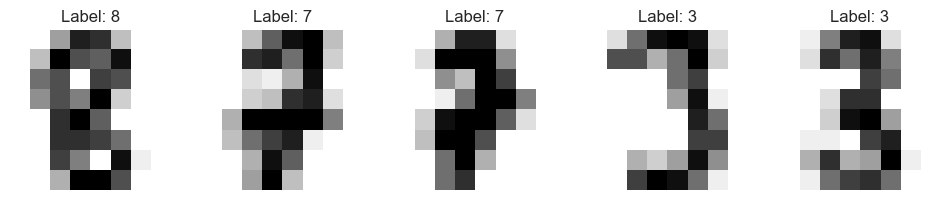

In [16]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

## Train and test datasets

Performing analysis before partitioning the dataset is a major error, that can lead to incorrect conclusions.  

We will reserve $80 \%$ of our dataset for training and $20 \%$ for testing.  

It is important that the train and test datasets are drawn randomly from our dataset, to ensure
no bias in the sampling.  
Say you are taking measurements of weather data to predict the weather in the coming 5 days.
You don't want to train your model on measurements taken from the hours 00.00 to 12.00, and then test it on data
collected from 12.00 to 24.00.

In [17]:
from sklearn.model_selection import train_test_split

# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

# equivalently in numpy
def train_test_split_numpy(inputs, labels, train_size, test_size):
    n_inputs = len(inputs)
    inputs_shuffled = inputs.copy()
    labels_shuffled = labels.copy()
    
    np.random.shuffle(inputs_shuffled)
    np.random.shuffle(labels_shuffled)
    
    train_end = int(n_inputs*train_size)
    X_train, X_test = inputs_shuffled[:train_end], inputs_shuffled[train_end:]
    Y_train, Y_test = labels_shuffled[:train_end], labels_shuffled[train_end:]
    
    return X_train, X_test, Y_train, Y_test

#X_train, X_test, Y_train, Y_test = train_test_split_numpy(inputs, labels, train_size, test_size)

print("Number of training images: " + str(len(X_train)))
print("Number of test images: " + str(len(X_test)))

Number of training images: 1437
Number of test images: 360


## Define model and architecture

Our simple feed-forward neural network will consist of an *input* layer, a single *hidden* layer and an *output* layer. The activation $y$ of each neuron is a weighted sum of inputs, passed through an activation function. In case of the simple perceptron model we have 

$$ z = \sum_{i=1}^n w_i a_i ,$$

$$ y = f(z) ,$$

where $f$ is the activation function, $a_i$ represents input from neuron $i$ in the preceding layer
and $w_i$ is the weight to input $i$.  
The activation of the neurons in the input layer is just the features (e.g. a pixel value).  

The simplest activation function for a neuron is the *Heaviside* function:

$$ f(z) = 
\begin{cases}
1,  &  z > 0\\
0,  & \text{otherwise}
\end{cases}
$$

A feed-forward neural network with this activation is known as a *perceptron*.  
For a binary classifier (i.e. two classes, 0 or 1, dog or not-dog) we can also use this in our output layer.  
This activation can be generalized to $k$ classes (using e.g. the *one-against-all* strategy), 
and we call these architectures *multiclass perceptrons*.  

However, it is now common to use the terms Single Layer Perceptron (SLP) (1 hidden layer) and  
Multilayer Perceptron (MLP) (2 or more hidden layers) to refer to feed-forward neural networks with any activation function.  

Typical choices for activation functions include the sigmoid function, hyperbolic tangent, and Rectified Linear Unit (ReLU).  
We will be using the sigmoid function $\sigma(x)$:  

$$ f(x) = \sigma(x) = \frac{1}{1 + e^{-x}} ,$$

which is inspired by probability theory (see logistic regression) and was most commonly used until about 2011. See the discussion below concerning other activation functions.

## Layers

* Input 

Since each input image has 8x8 = 64 pixels or features, we have an input layer of 64 neurons.  

* Hidden layer

We will use 50 neurons in the hidden layer receiving input from the neurons in the input layer.  
Since each neuron in the hidden layer is connected to the 64 inputs we have 64x50 = 3200 weights to the hidden layer.  

* Output

If we were building a binary classifier, it would be sufficient with a single neuron in the output layer,
which could output 0 or 1 according to the Heaviside function. This would be an example of a *hard* classifier, meaning it outputs the class of the input directly. However, if we are dealing with noisy data it is often beneficial to use a *soft* classifier, which outputs the probability of being in class 0 or 1.  

For a soft binary classifier, we could use a single neuron and interpret the output as either being the probability of being in class 0 or the probability of being in class 1. Alternatively we could use 2 neurons, and interpret each neuron as the probability of being in each class.  

Since we are doing multiclass classification, with 10 categories, it is natural to use 10 neurons in the output layer. We number the neurons $j = 0,1,...,9$. The activation of each output neuron $j$ will be according to the *softmax* function:  

$$ P(\text{class $j$} \mid \text{input $\boldsymbol{a}$}) = \frac{\exp{(\boldsymbol{a}^T \boldsymbol{w}_j)}}
{\sum_{c=0}^{9} \exp{(\boldsymbol{a}^T \boldsymbol{w}_c)}} ,$$  

i.e. each neuron $j$ outputs the probability of being in class $j$ given an input from the hidden layer $\boldsymbol{a}$, with $\boldsymbol{w}_j$ the weights of neuron $j$ to the inputs.  
The denominator is a normalization factor to ensure the outputs (probabilities) sum up to 1.  
The exponent is just the weighted sum of inputs as before:  

$$ z_j = \sum_{i=1}^n w_ {ij} a_i+b_j.$$  

Since each neuron in the output layer is connected to the 50 inputs from the hidden layer we have 50x10 = 500
weights to the output layer.

## Weights and biases

Typically weights are initialized with small values distributed around zero, drawn from a uniform
or normal distribution. Setting all weights to zero means all neurons give the same output, making the network useless.  

Adding a bias value to the weighted sum of inputs allows the neural network to represent a greater range
of values. Without it, any input with the value 0 will be mapped to zero (before being passed through the activation). The bias unit has an output of 1, and a weight to each neuron $j$, $b_j$:  

$$ z_j = \sum_{i=1}^n w_ {ij} a_i + b_j.$$  

The bias weights $\boldsymbol{b}$ are often initialized to zero, but a small value like $0.01$ ensures all neurons have some output which can be backpropagated in the first training cycle.

In [18]:
# building our neural network

n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 10

# we make the weights normally distributed using numpy.random.randn

# weights and bias in the hidden layer
hidden_weights = np.random.randn(n_features, n_hidden_neurons)
hidden_bias = np.zeros(n_hidden_neurons) + 0.01

# weights and bias in the output layer
output_weights = np.random.randn(n_hidden_neurons, n_categories)
output_bias = np.zeros(n_categories) + 0.01

## Feed-forward pass

Denote $F$ the number of features, $H$ the number of hidden neurons and $C$ the number of categories.  
For each input image we calculate a weighted sum of input features (pixel values) to each neuron $j$ in the hidden layer $l$:  

$$ z_{j}^{l} = \sum_{i=1}^{F} w_{ij}^{l} x_i + b_{j}^{l},$$

this is then passed through our activation function  

$$ a_{j}^{l} = f(z_{j}^{l}) .$$  

We calculate a weighted sum of inputs (activations in the hidden layer) to each neuron $j$ in the output layer:  

$$ z_{j}^{L} = \sum_{i=1}^{H} w_{ij}^{L} a_{i}^{l} + b_{j}^{L}.$$  

Finally we calculate the output of neuron $j$ in the output layer using the softmax function:  

$$ a_{j}^{L} = \frac{\exp{(z_j^{L})}}
{\sum_{c=0}^{C-1} \exp{(z_c^{L})}} .$$

## Matrix multiplications

Since our data has the dimensions $X = (n_{inputs}, n_{features})$ and our weights to the hidden
layer have the dimensions  
$W_{hidden} = (n_{features}, n_{hidden})$,
we can easily feed the network all our training data in one go by taking the matrix product  

$$ X W^{h} = (n_{inputs}, n_{hidden}),$$ 

and obtain a matrix that holds the weighted sum of inputs to the hidden layer
for each input image and each hidden neuron.    
We also add the bias to obtain a matrix of weighted sums to the hidden layer $Z^{h}$:  

$$ \boldsymbol{z}^{l} = \boldsymbol{X} \boldsymbol{W}^{l} + \boldsymbol{b}^{l} ,$$

meaning the same bias (1D array with size equal number of hidden neurons) is added to each input image.  
This is then passed through the activation:  

$$ \boldsymbol{a}^{l} = f(\boldsymbol{z}^l) .$$  

This is fed to the output layer:  

$$ \boldsymbol{z}^{L} = \boldsymbol{a}^{L} \boldsymbol{W}^{L} + \boldsymbol{b}^{L} .$$

Finally we receive our output values for each image and each category by passing it through the softmax function:  

$$ output = softmax (\boldsymbol{z}^{L}) = (n_{inputs}, n_{categories}) .$$

In [19]:
# setup the feed-forward pass, subscript h = hidden layer

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def feed_forward(X):
    # weighted sum of inputs to the hidden layer
    z_h = np.matmul(X, hidden_weights) + hidden_bias
    # activation in the hidden layer
    a_h = sigmoid(z_h)
    
    # weighted sum of inputs to the output layer
    z_o = np.matmul(a_h, output_weights) + output_bias
    # softmax output
    # axis 0 holds each input and axis 1 the probabilities of each category
    exp_term = np.exp(z_o)
    probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
    
    return probabilities

probabilities = feed_forward(X_train)
print("probabilities = (n_inputs, n_categories) = " + str(probabilities.shape))
print("probability that image 0 is in category 0,1,2,...,9 = \n" + str(probabilities[0]))
print("probabilities sum up to: " + str(probabilities[0].sum()))
print()

# we obtain a prediction by taking the class with the highest likelihood
def predict(X):
    probabilities = feed_forward(X)
    return np.argmax(probabilities, axis=1)

predictions = predict(X_train)
print("predictions = (n_inputs) = " + str(predictions.shape))
print("prediction for image 0: " + str(predictions[0]))
print("correct label for image 0: " + str(Y_train[0]))

probabilities = (n_inputs, n_categories) = (1437, 10)
probability that image 0 is in category 0,1,2,...,9 = 
[5.41511965e-04 2.17174962e-03 8.84355903e-03 1.44970586e-03
 1.10378326e-04 5.08318298e-09 2.03256632e-04 1.92507116e-03
 9.84443254e-01 3.11507992e-04]
probabilities sum up to: 1.0

predictions = (n_inputs) = (1437,)
prediction for image 0: 8
correct label for image 0: 6


## Choose cost function and optimizer

To measure how well our neural network is doing we need to introduce a cost function.  
We will call the function that gives the error of a single sample output the *loss* function, and the function
that gives the total error of our network across all samples the *cost* function.
A typical choice for multiclass classification is the *cross-entropy* loss, also known as the negative log likelihood.  

In *multiclass* classification it is common to treat each integer label as a so called *one-hot* vector:  

$$ y = 5 \quad \rightarrow \quad \boldsymbol{y} = (0, 0, 0, 0, 0, 1, 0, 0, 0, 0) ,$$  

$$ y = 1 \quad \rightarrow \quad \boldsymbol{y} = (0, 1, 0, 0, 0, 0, 0, 0, 0, 0) ,$$  

i.e. a binary bit string of length $C$, where $C = 10$ is the number of classes in the MNIST dataset.  

Let $y_{ic}$ denote the $c$-th component of the $i$-th one-hot vector.  
We define the cost function $\mathcal{C}$ as a sum over the cross-entropy loss for each point $\boldsymbol{x}_i$ in the dataset.

In the one-hot representation only one of the terms in the loss function is non-zero, namely the
probability of the correct category $c'$  
(i.e. the category $c'$ such that $y_{ic'} = 1$). This means that the cross entropy loss only punishes you for how wrong
you got the correct label. The probability of category $c$ is given by the softmax function. The vector $\boldsymbol{\theta}$ represents the parameters of our network, i.e. all the weights and biases.

## Optimizing the cost function

The network is trained by finding the weights and biases that minimize the cost function. One of the most widely used classes of methods is *gradient descent* and its generalizations. The idea behind gradient descent
is simply to adjust the weights in the direction where the gradient of the cost function is large and negative. This ensures we flow toward a *local* minimum of the cost function.  
Each parameter $\theta$ is iteratively adjusted according to the rule  

$$ \theta_{i+1} = \theta_i - \eta \nabla \mathcal{C}(\theta_i) ,$$

where $\eta$ is known as the *learning rate*, which controls how big a step we take towards the minimum.  
This update can be repeated for any number of iterations, or until we are satisfied with the result.  

A simple and effective improvement is a variant called *Batch Gradient Descent*.  
Instead of calculating the gradient on the whole dataset, we calculate an approximation of the gradient
on a subset of the data called a *minibatch*.  
If there are $N$ data points and we have a minibatch size of $M$, the total number of batches
is $N/M$.  
We denote each minibatch $B_k$, with $k = 1, 2,...,N/M$. The gradient then becomes:  

$$ \nabla \mathcal{C}(\theta) = \frac{1}{N} \sum_{i=1}^N \nabla \mathcal{L}_i(\theta) \quad \rightarrow \quad
\frac{1}{M} \sum_{i \in B_k} \nabla \mathcal{L}_i(\theta) ,$$

i.e. instead of averaging the loss over the entire dataset, we average over a minibatch.  

This has two important benefits:  
1. Introducing stochasticity decreases the chance that the algorithm becomes stuck in a local minima.  

2. It significantly speeds up the calculation, since we do not have to use the entire dataset to calculate the gradient.  

The various optmization  methods, with codes and algorithms,  are discussed in our lectures on [Gradient descent approaches](https://compphysics.github.io/MachineLearning/doc/pub/Splines/html/Splines-bs.html).

## Regularization

It is common to add an extra term to the cost function, proportional
to the size of the weights.  This is equivalent to constraining the
size of the weights, so that they do not grow out of control.
Constraining the size of the weights means that the weights cannot
grow arbitrarily large to fit the training data, and in this way
reduces *overfitting*.

We will measure the size of the weights using the so called *L2-norm*, meaning our cost function becomes:  

$$  \mathcal{C}(\theta) = \frac{1}{N} \sum_{i=1}^N \mathcal{L}_i(\theta) \quad \rightarrow \quad
\frac{1}{N} \sum_{i=1}^N  \mathcal{L}_i(\theta) + \lambda \lvert \lvert \boldsymbol{w} \rvert \rvert_2^2 
= \frac{1}{N} \sum_{i=1}^N  \mathcal{L}(\theta) + \lambda \sum_{ij} w_{ij}^2,$$  

i.e. we sum up all the weights squared. The factor $\lambda$ is known as a regularization parameter.

In order to train the model, we need to calculate the derivative of
the cost function with respect to every bias and weight in the
network.  In total our network has $(64 + 1)\times 50=3250$ weights in
the hidden layer and $(50 + 1)\times 10=510$ weights to the output
layer ($+1$ for the bias), and the gradient must be calculated for
every parameter.  We use the *backpropagation* algorithm discussed
above. This is a clever use of the chain rule that allows us to
calculate the gradient efficently.

## Matrix  multiplication

To more efficently train our network these equations are implemented using matrix operations.  
The error in the output layer is calculated simply as, with $\boldsymbol{t}$ being our targets,  

$$ \delta_L = \boldsymbol{t} - \boldsymbol{y} = (n_{inputs}, n_{categories}) .$$  

The gradient for the output weights is calculated as  

$$ \nabla W_{L} = \boldsymbol{a}^T \delta_L   = (n_{hidden}, n_{categories}) ,$$

where $\boldsymbol{a} = (n_{inputs}, n_{hidden})$. This simply means that we are summing up the gradients for each input.  
Since we are going backwards we have to transpose the activation matrix.  

The gradient with respect to the output bias is then  

$$ \nabla \boldsymbol{b}_{L} = \sum_{i=1}^{n_{inputs}} \delta_L = (n_{categories}) .$$  

The error in the hidden layer is  

$$ \Delta_h = \delta_L W_{L}^T \circ f'(z_{h}) = \delta_L W_{L}^T \circ a_{h} \circ (1 - a_{h}) = (n_{inputs}, n_{hidden}) ,$$  

where $f'(a_{h})$ is the derivative of the activation in the hidden layer. The matrix products mean
that we are summing up the products for each neuron in the output layer. The symbol $\circ$ denotes
the *Hadamard product*, meaning element-wise multiplication.  

This again gives us the gradients in the hidden layer:  

$$ \nabla W_{h} = X^T \delta_h = (n_{features}, n_{hidden}) ,$$  

$$ \nabla b_{h} = \sum_{i=1}^{n_{inputs}} \delta_h = (n_{hidden}) .$$

In [31]:
# to categorical turns our integer vector into a onehot representation
from sklearn.metrics import accuracy_score

# one-hot in numpy
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

#Y_train_onehot, Y_test_onehot = to_categorical(Y_train), to_categorical(Y_test)
#Y_train_onehot, Y_test_onehot = to_categorical_numpy(Y_train), to_categorical_numpy(Y_test)
X_train = np.array([ [0, 0], [0, 1], [1, 0],[1, 1]],dtype=np.float64)
Y_train_onehot = yXOR
Y_train = yXOR

# building our neural network

n_inputs, n_features = X_train.shape
n_hidden_neurons = 2
n_categories = 1

# we make the weights normally distributed using numpy.random.randn

# weights and bias in the hidden layer
hidden_weights = np.random.randn(n_features, n_hidden_neurons)
hidden_bias = np.zeros(n_hidden_neurons) + 0.01

# weights and bias in the output layer
output_weights = np.random.randn(n_hidden_neurons, n_categories)
output_bias = np.zeros(n_categories) + 0.01

def feed_forward_train(X):
    # weighted sum of inputs to the hidden layer
    z_h = np.matmul(X, hidden_weights) + hidden_bias
    # activation in the hidden layer
    a_h = sigmoid(z_h)
    
    # weighted sum of inputs to the output layer
    z_o = np.matmul(a_h, output_weights) + output_bias
    # softmax output
    # axis 0 holds each input and axis 1 the probabilities of each category
    exp_term = np.exp(z_o)
    probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
    
    # for backpropagation need activations in hidden and output layers
    return a_h, probabilities

def backpropagation(X, Y):
    a_h, probabilities = feed_forward_train(X)
    
    # error in the output layer
    error_output = probabilities - Y
    # error in the hidden layer
    error_hidden = np.matmul(error_output, output_weights.T) * a_h * (1 - a_h)
    
    # gradients for the output layer
    output_weights_gradient = np.matmul(a_h.T, error_output)
    output_bias_gradient = np.sum(error_output, axis=0)
    
    # gradient for the hidden layer
    hidden_weights_gradient = np.matmul(X.T, error_hidden)
    hidden_bias_gradient = np.sum(error_hidden, axis=0)

    return output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient

print("Old accuracy on training data: " + str(accuracy_score(predict(X_train), Y_train)))

eta = 0.01
lmbd = 0.01
for i in range(1000):
    # calculate gradients
    dWo, dBo, dWh, dBh = backpropagation(X_train, Y_train_onehot)
    
    # regularization term gradients
    dWo += lmbd * output_weights
    dWh += lmbd * hidden_weights
    
    # update weights and biases
    output_weights -= eta * dWo
    output_bias -= eta * dBo
    hidden_weights -= eta * dWh
    hidden_bias -= eta * dBh

print("New accuracy on training data: " + str(accuracy_score(predict(X_train), Y_train)))

Old accuracy on training data: 0.5


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)

## Improving performance

As we can see the network does not seem to be learning at all. It seems to be just guessing the label for each image.  
In order to obtain a network that does something useful, we will have to do a bit more work.  

The choice of *hyperparameters* such as learning rate and regularization parameter is hugely influential for the performance of the network. Typically a *grid-search* is performed, wherein we test different hyperparameters separated by orders of magnitude. For example we could test the learning rates $\eta = 10^{-6}, 10^{-5},...,10^{-1}$ with different regularization parameters $\lambda = 10^{-6},...,10^{-0}$.  

Next, we haven't implemented minibatching yet, which introduces stochasticity and is though to act as an important regularizer on the weights. We call a feed-forward + backward pass with a minibatch an *iteration*, and a full training period
going through the entire dataset ($n/M$ batches) an *epoch*.

If this does not improve network performance, you may want to consider altering the network architecture, adding more neurons or hidden layers.  
Andrew Ng goes through some of these considerations in this [video](https://youtu.be/F1ka6a13S9I). You can find a summary of the video [here](https://kevinzakka.github.io/2016/09/26/applying-deep-learning/).

## Full object-oriented implementation

It is very natural to think of the network as an object, with specific instances of the network
being realizations of this object with different hyperparameters. An implementation using Python classes provides a clean structure and interface, and the full implementation of our neural network is given below.

In [21]:
class NeuralNetwork:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons=50,
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd

        self.create_biases_and_weights()

    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = sigmoid(self.z_h)

        self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(self.z_o)
        self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = sigmoid(z_h)

        z_o = np.matmul(a_h, self.output_weights) + self.output_bias
        
        exp_term = np.exp(z_o)
        probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        return probabilities

    def backpropagation(self):
        error_output = self.probabilities - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        return np.argmax(probabilities, axis=1)

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()

## Evaluate model performance on test data

To measure the performance of our network we evaluate how well it does it data it has never seen before, i.e. the test data.  
We measure the performance of the network using the *accuracy* score.  
The accuracy is as you would expect just the number of images correctly labeled divided by the total number of images. A perfect classifier will have an accuracy score of $1$.  

$$ \text{Accuracy} = \frac{\sum_{i=1}^n I(\tilde{y}_i = y_i)}{n} ,$$  

where $I$ is the indicator function, $1$ if $\tilde{y}_i = y_i$ and $0$ otherwise.

In [22]:
epochs = 100
batch_size = 100

dnn = NeuralNetwork(X_train, Y_train_onehot, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                    n_hidden_neurons=n_hidden_neurons, n_categories=n_categories)
dnn.train()
test_predict = dnn.predict(X_test)

# accuracy score from scikit library
print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))

# equivalent in numpy
def accuracy_score_numpy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

#print("Accuracy score on test set: ", accuracy_score_numpy(Y_test, test_predict))

Accuracy score on test set:  0.9444444444444444


## Adjust hyperparameters

We now perform a grid search to find the optimal hyperparameters for the network.  
Note that we are only using 1 layer with 50 neurons, and human performance is estimated to be around $98\%$ ($2\%$ error rate).

In [23]:
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

# grid search
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = NeuralNetwork(X_train, Y_train_onehot, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                            n_hidden_neurons=n_hidden_neurons, n_categories=n_categories)
        dnn.train()
        
        DNN_numpy[i][j] = dnn
        
        test_predict = dnn.predict(X_test)
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))
        print()

Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.11666666666666667

Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.20833333333333334

Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.12222222222222222

Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.14722222222222223

Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.17777777777777778

Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.16111111111111112

Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.20277777777777778

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.5305555555555556

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.5944444444444444

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.5888888888888889

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.6111111111111112

Learning rate  

/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  1e-05
Accuracy score on test set:  0.10555555555555556



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.0001
Accuracy score on test set:  0.08611111111111111



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.001
Accuracy score on test set:  0.10555555555555556



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.01
Accuracy score on test set:  0.08888888888888889



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.1
Accuracy score on test set:  0.08611111111111111



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  1.0
Accuracy score on test set:  0.08888888888888889



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  10.0
Accuracy score on test set:  0.09166666666666666



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  1e-05
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.0001
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.001
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.01
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.1
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  1.0
Lambda =  1.0
Accuracy score on test set:  0.10555555555555556



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  10.0
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  1e-05
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.0001
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.001
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.01
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.1
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  1.0
Accuracy score on test set:  0.07777777777777778



/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/1630775253.py:44: RuntimeWarning: invalid value encountered in divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  10.0
Accuracy score on test set:  0.07777777777777778



## Visualization

/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_12312/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


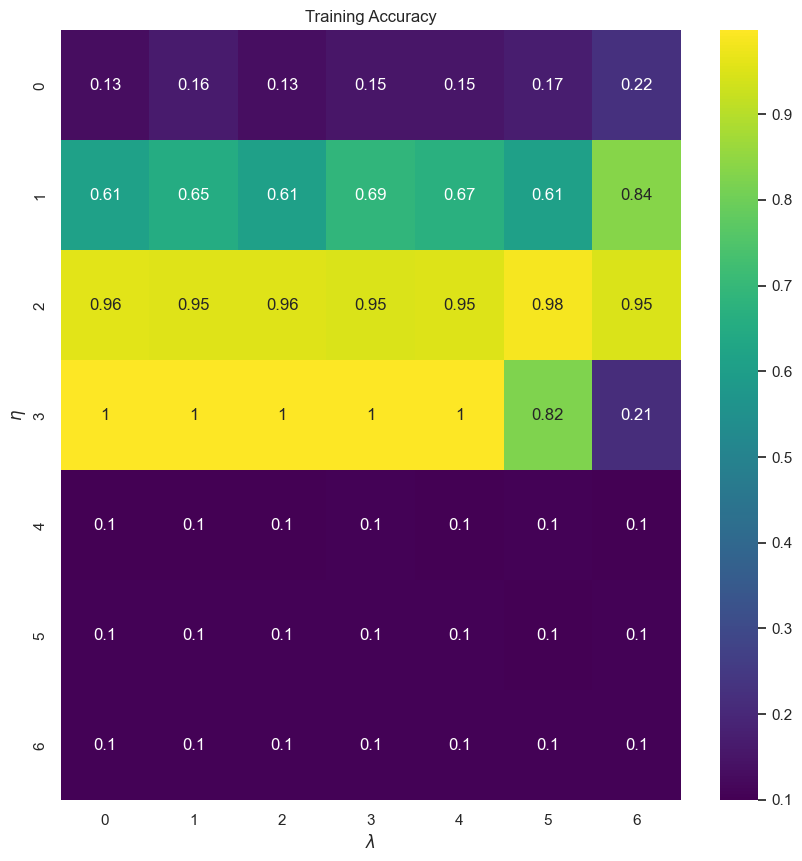

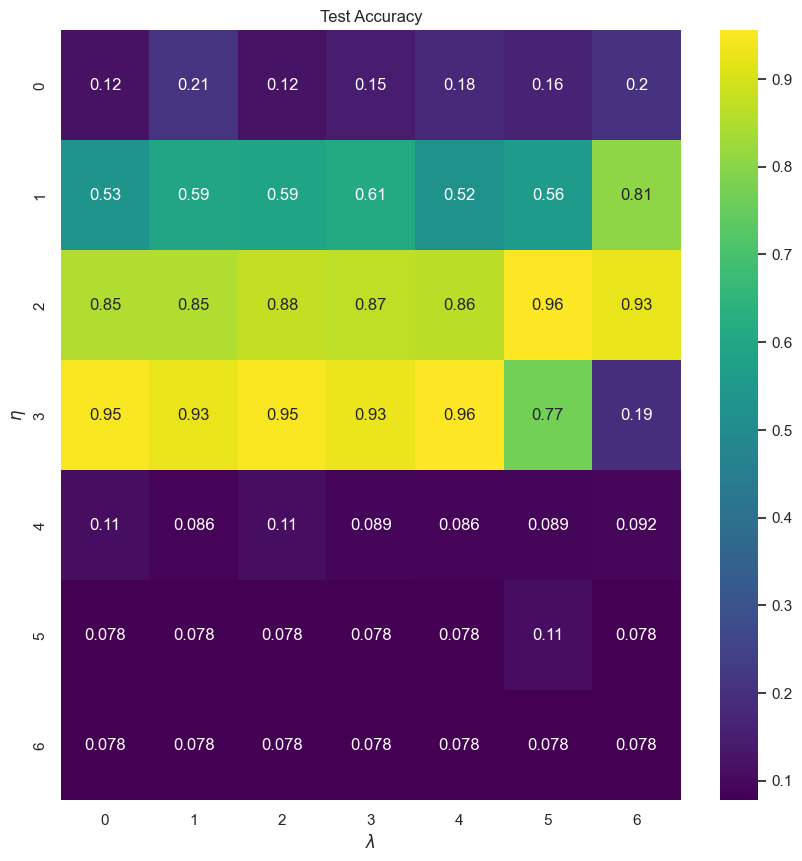

In [24]:
# visual representation of grid search
# uses seaborn heatmap, you can also do this with matplotlib imshow
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_numpy[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(Y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(Y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## scikit-learn implementation

**scikit-learn** focuses more
on traditional machine learning methods, such as regression,
clustering, decision trees, etc. As such, it has only two types of
neural networks: Multi Layer Perceptron outputting continuous values,
*MPLRegressor*, and Multi Layer Perceptron outputting labels,
*MLPClassifier*. We will see how simple it is to use these classes.

**scikit-learn** implements a few improvements from our neural network,
such as early stopping, a varying learning rate, different
optimization methods, etc. We would therefore expect a better
performance overall.

In [25]:
from sklearn.neural_network import MLPClassifier
# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, Y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(X_test, Y_test))
        print()

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.18333333333333332



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.18611111111111112



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.13055555555555556



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.24444444444444444



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.23333333333333334



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.12777777777777777



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.1527777777777778



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.9111111111111111



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.8888888888888888



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.8722222222222222



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.8305555555555556



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.8888888888888888



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on test set:  0.8805555555555555



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  10.0
Accuracy score on test set:  0.8944444444444445



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  1e-05
Accuracy score on test set:  0.975



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.0001
Accuracy score on test set:  0.9777777777777777



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.001
Accuracy score on test set:  0.9805555555555555



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.01
Accuracy score on test set:  0.9861111111111112



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.1
Accuracy score on test set:  0.9805555555555555



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  1.0
Accuracy score on test set:  0.9777777777777777



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  10.0
Accuracy score on test set:  0.9444444444444444



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.01
Lambda =  1e-05
Accuracy score on test set:  0.9861111111111112

Learning rate  =  0.01
Lambda =  0.0001
Accuracy score on test set:  0.9888888888888889

Learning rate  =  0.01
Lambda =  0.001
Accuracy score on test set:  0.9888888888888889

Learning rate  =  0.01
Lambda =  0.01
Accuracy score on test set:  0.9861111111111112

Learning rate  =  0.01
Lambda =  0.1
Accuracy score on test set:  0.9888888888888889

Learning rate  =  0.01
Lambda =  1.0
Accuracy score on test set:  0.9722222222222222

Learning rate  =  0.01
Lambda =  10.0
Accuracy score on test set:  0.9527777777777777

Learning rate  =  0.1
Lambda =  1e-05
Accuracy score on test set:  0.9027777777777778

Learning rate  =  0.1
Lambda =  0.0001
Accuracy score on test set:  0.8583333333333333

Learning rate  =  0.1
Lambda =  0.001
Accuracy score on test set:  0.8722222222222222

Learning rate  =  0.1
Lambda =  0.01
Accuracy score on test set:  0.9055555555555556

Learning rate  =  0.1
Lambda =  0.1
Accur

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Learning rate  =  1.0
Lambda =  0.0001
Accuracy score on test set:  0.5722222222222222

Learning rate  =  1.0
Lambda =  0.001
Accuracy score on test set:  0.1527777777777778

Learning rate  =  1.0
Lambda =  0.01
Accuracy score on test set:  0.12777777777777777

Learning rate  =  1.0
Lambda =  0.1
Accuracy score on test set:  0.11388888888888889

Learning rate  =  1.0
Lambda =  1.0
Accuracy score on test set:  0.1361111111111111

Learning rate  =  1.0
Lambda =  10.0
Accuracy score on test set:  0.12222222222222222

Learning rate  =  10.0
Lambda =  1e-05
Accuracy score on test set:  0.09166666666666666

Learning rate  =  10.0
Lambda =  0.0001
Accuracy score on test set:  0.13055555555555556

Learning rate  =  10.0
Lambda =  0.001
Accuracy score on test set:  0.11388888888888889

Learning rate  =  10.0
Lambda =  0.01
Accuracy score on test set:  0.07777777777777778

Learning rate  =  10.0
Lambda =  0.1
Accuracy score on test set:  0.09166666666666666

Learning rate  =  10.0
Lambda =  1.0


## Visualization

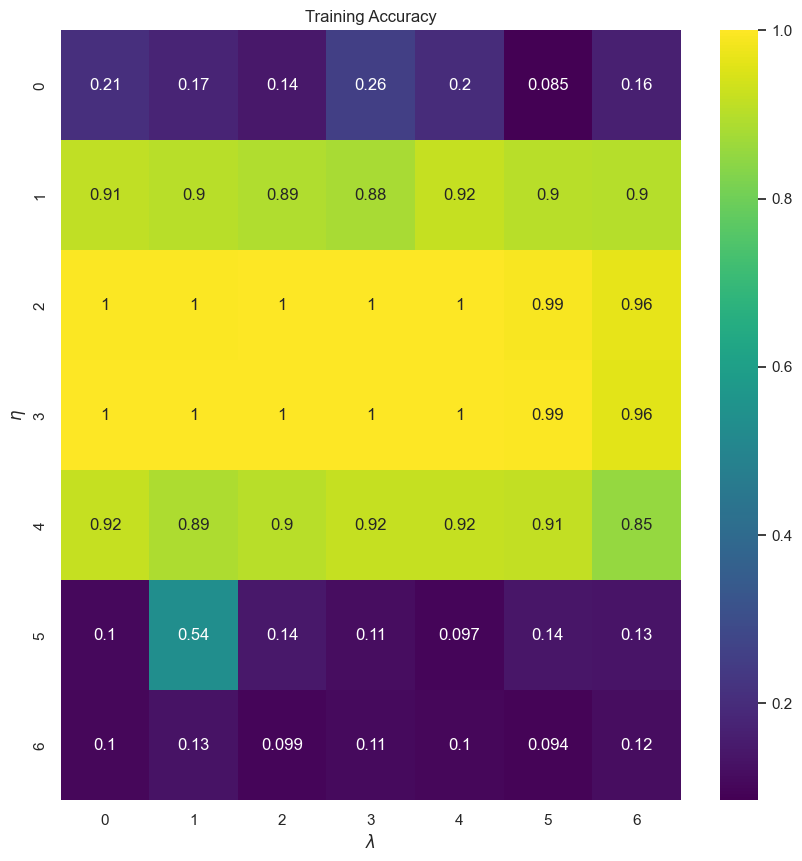

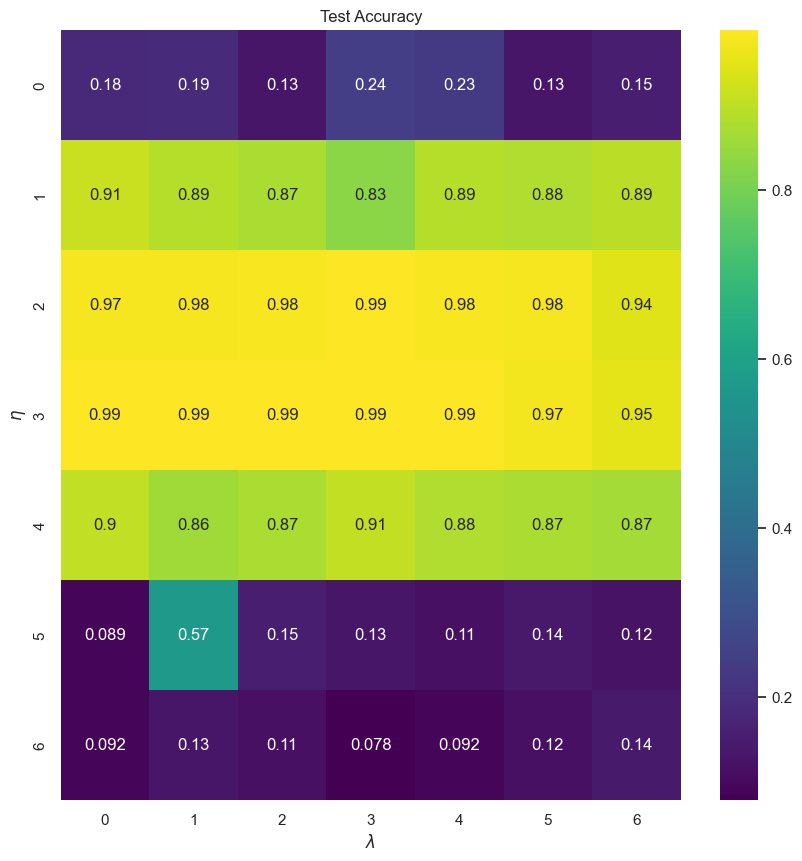

In [26]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(Y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(Y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## Building neural networks in Tensorflow and Keras

Now we want  to build on the experience gained from our neural network implementation in NumPy and scikit-learn
and use it to construct a neural network in Tensorflow. Once we have constructed a neural network in NumPy
and Tensorflow, building one in Keras is really quite trivial, though the performance may suffer.  

In our previous example we used only one hidden layer, and in this we will use two. From this it should be quite
clear how to build one using an arbitrary number of hidden layers, using data structures such as Python lists or
NumPy arrays.

## Tensorflow

Tensorflow is an open source library machine learning library
developed by the Google Brain team for internal use. It was released
under the Apache 2.0 open source license in November 9, 2015.

Tensorflow is a computational framework that allows you to construct
machine learning models at different levels of abstraction, from
high-level, object-oriented APIs like Keras, down to the C++ kernels
that Tensorflow is built upon. The higher levels of abstraction are
simpler to use, but less flexible, and our choice of implementation
should reflect the problems we are trying to solve.

[Tensorflow uses](https://www.tensorflow.org/guide/graphs) so-called graphs to represent your computation
in terms of the dependencies between individual operations, such that you first build a Tensorflow *graph*
to represent your model, and then create a Tensorflow *session* to run the graph.

In this guide we will analyze the same data as we did in our NumPy and
scikit-learn tutorial, gathered from the MNIST database of images. We
will give an introduction to the lower level Python Application
Program Interfaces (APIs), and see how we use them to build our graph.
Then we will build (effectively) the same graph in Keras, to see just
how simple solving a machine learning problem can be.

To install tensorflow on Unix/Linux systems, use pip as

In [27]:
pip3 install tensorflow

SyntaxError: invalid syntax (2357089093.py, line 1)

and/or if you use **anaconda**, just write (or install from the graphical user interface)
(current release of CPU-only TensorFlow)

In [ ]:
conda create -n tf tensorflow
conda activate tf

To install the current release of GPU TensorFlow

In [ ]:
conda create -n tf-gpu tensorflow-gpu
conda activate tf-gpu

## Using Keras

Keras is a high level [neural network](https://en.wikipedia.org/wiki/Application_programming_interface)
that supports Tensorflow, CTNK and Theano as backends.  
If you have Anaconda installed you may run the following command

In [ ]:
conda install keras

You can look up the [instructions here](https://keras.io/) for more information.

We will to a large extent use **keras** in our examples..

## Collect and pre-process data

Let us look again at the MINST data set.

In [ ]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function

from sklearn.model_selection import train_test_split

# one-hot representation of labels
labels = to_categorical(labels)

# split into train and test data
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

In [ ]:

epochs = 100
batch_size = 100
n_neurons_layer1 = 100
n_neurons_layer2 = 50
n_categories = 10
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
def create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories, eta, lmbd):
    model = Sequential()
    model.add(Dense(n_neurons_layer1, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(Dense(n_neurons_layer2, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(Dense(n_categories, activation='softmax'))
    
    sgd = optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

In [ ]:
DNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        DNN = create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories,
                                         eta=eta, lmbd=lmbd)
        DNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = DNN.evaluate(X_test, Y_test)
        
        DNN_keras[i][j] = DNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

In [ ]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        DNN = DNN_keras[i][j]

        train_accuracy[i][j] = DNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = DNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## The Breast Cancer Data, now with Keras

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.datasets import load_breast_cancer
import pickle
import os 


"""Load breast cancer dataset"""

np.random.seed(0)        #create same seed for random number every time

cancer=load_breast_cancer()      #Download breast cancer dataset

inputs=cancer.data                     #Feature matrix of 569 rows (samples) and 30 columns (parameters)
outputs=cancer.target                  #Label array of 569 rows (0 for benign and 1 for malignant)
labels=cancer.feature_names[0:30]

print('The content of the breast cancer dataset is:')      #Print information about the datasets
print(labels)
print('-------------------------')
print("inputs =  " + str(inputs.shape))
print("outputs =  " + str(outputs.shape))
print("labels =  "+ str(labels.shape))

x=inputs      #Reassign the Feature and Label matrices to other variables
y=outputs

#%% 

# Visualisation of dataset (for correlation analysis)

plt.figure()
plt.scatter(x[:,0],x[:,2],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean perimeter',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,5],x[:,6],s=40,c=y, cmap=plt.cm.Spectral)
plt.xlabel('Mean compactness',fontweight='bold')
plt.ylabel('Mean concavity',fontweight='bold')
plt.show()


plt.figure()
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean texture',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,2],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean perimeter',fontweight='bold')
plt.ylabel('Mean compactness',fontweight='bold')
plt.show()


# Generate training and testing datasets

#Select features relevant to classification (texture,perimeter,compactness and symmetery) 
#and add to input matrix

temp1=np.reshape(x[:,1],(len(x[:,1]),1))
temp2=np.reshape(x[:,2],(len(x[:,2]),1))
X=np.hstack((temp1,temp2))      
temp=np.reshape(x[:,5],(len(x[:,5]),1))
X=np.hstack((X,temp))       
temp=np.reshape(x[:,8],(len(x[:,8]),1))
X=np.hstack((X,temp))       

X_train,X_test,y_train,y_test=splitter(X,y,test_size=0.1)   #Split datasets into training and testing

y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
y_test=to_categorical(y_test)

del temp1,temp2,temp

# %%

# Define tunable parameters"

eta=np.logspace(-3,-1,3)                    #Define vector of learning rates (parameter to SGD optimiser)
lamda=0.01                                  #Define hyperparameter
n_layers=2                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,3,4,dtype=int)       #Define number of neurons per layer
epochs=100                                   #Number of reiterations over the input data
batch_size=100                              #Number of samples per gradient update

# %%

"""Define function to return Deep Neural Network model"""

def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

    
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]
               

def plot_data(x,y,data,title=None):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('accuracy (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show()
    
plot_data(eta,n_neuron,Train_accuracy, 'training')
plot_data(eta,n_neuron,Test_accuracy, 'testing')

## Fine-tuning neural network hyperparameters

The flexibility of neural networks is also one of their main
drawbacks: there are many hyperparameters to tweak. Not only can you
use any imaginable network topology (how neurons/nodes are interconnected),
but even in a simple FFNN you can change the number of layers, the
number of neurons per layer, the type of activation function to use in
each layer, the weight initialization logic, the stochastic gradient optmized and much more. How do you
know what combination of hyperparameters is the best for your task?

* You can use grid search with cross-validation to find the right hyperparameters.

However,since there are many hyperparameters to tune, and since
training a neural network on a large dataset takes a lot of time, you
will only be able to explore a tiny part of the hyperparameter space.

* You can use randomized search.

* Or use tools like [Oscar](http://oscar.calldesk.ai/), which implements more complex algorithms to help you find a good set of hyperparameters quickly.

## Hidden layers

For many problems you can start with just one or two hidden layers and it will work just fine.
For the MNIST data set you ca easily get a high accuracy using just one hidden layer with a
few hundred neurons.
You can reach for this data set above 98% accuracy using two hidden layers with the same total amount of
neurons, in roughly the same amount of training time. 

For more complex problems, you can gradually
ramp up the number of hidden layers, until you start overfitting the training set. Very complex tasks, such
as large image classification or speech recognition, typically require networks with dozens of layers
and they need a huge amount
of training data. However, you will rarely have to train such networks from scratch: it is much more
common to reuse parts of a pretrained state-of-the-art network that performs a similar task.

## Which activation function should I use?

The Back propagation algorithm we derived above works by going from
the output layer to the input layer, propagating the error gradient on
the way. Once the algorithm has computed the gradient of the cost
function with regards to each parameter in the network, it uses these
gradients to update each parameter with a Gradient Descent (GD) step.

Unfortunately for us, the gradients often get smaller and smaller as the
algorithm progresses down to the first hidden layers. As a result, the
GD update leaves the lower layer connection weights
virtually unchanged, and training never converges to a good
solution. This is known in the literature as 
**the vanishing gradients problem**. 

In other cases, the opposite can happen, namely the the gradients can grow bigger and
bigger. The result is that many of the layers get large updates of the 
weights the
algorithm diverges. This is the **exploding gradients problem**, which is
mostly encountered in recurrent neural networks. More generally, deep
neural networks suffer from unstable gradients, different layers may
learn at widely different speeds

## Is the Logistic activation function (Sigmoid)  our choice?

Although this unfortunate behavior has been empirically observed for
quite a while (it was one of the reasons why deep neural networks were
mostly abandoned for a long time), it is only around 2010 that
significant progress was made in understanding it.

A paper titled [Understanding the Difficulty of Training Deep
Feedforward Neural Networks by Xavier Glorot and Yoshua Bengio](http://proceedings.mlr.press/v9/glorot10a.html) found that
the problems with the popular logistic
sigmoid activation function and the weight initialization technique
that was most popular at the time, namely random initialization using
a normal distribution with a mean of 0 and a standard deviation of
1. 

They showed that with this activation function and this
initialization scheme, the variance of the outputs of each layer is
much greater than the variance of its inputs. Going forward in the
network, the variance keeps increasing after each layer until the
activation function saturates at the top layers. This is actually made
worse by the fact that the logistic function has a mean of 0.5, not 0
(the hyperbolic tangent function has a mean of 0 and behaves slightly
better than the logistic function in deep networks).

## The derivative of the Logistic funtion

Looking at the logistic activation function, when inputs become large
(negative or positive), the function saturates at 0 or 1, with a
derivative extremely close to 0. Thus when backpropagation kicks in,
it has virtually no gradient to propagate back through the network,
and what little gradient exists keeps getting diluted as
backpropagation progresses down through the top layers, so there is
really nothing left for the lower layers.

In their paper, Glorot and Bengio propose a way to significantly
alleviate this problem. We need the signal to flow properly in both
directions: in the forward direction when making predictions, and in
the reverse direction when backpropagating gradients. We don’t want
the signal to die out, nor do we want it to explode and saturate. For
the signal to flow properly, the authors argue that we need the
variance of the outputs of each layer to be equal to the variance of
its inputs, and we also need the gradients to have equal variance
before and after flowing through a layer in the reverse direction.

One of the insights in the 2010 paper by Glorot and Bengio was that
the vanishing/exploding gradients problems were in part due to a poor
choice of activation function. Until then most people had assumed that
if Nature had chosen to use roughly sigmoid activation functions in
biological neurons, they must be an excellent choice. But it turns out
that other activation functions behave much better in deep neural
networks, in particular the ReLU activation function, mostly because
it does not saturate for positive values (and also because it is quite
fast to compute).

## The RELU function family

The ReLU activation function suffers from a problem known as the dying
ReLUs: during training, some neurons effectively die, meaning they
stop outputting anything other than 0.

In some cases, you may find that half of your network’s neurons are
dead, especially if you used a large learning rate. During training,
if a neuron’s weights get updated such that the weighted sum of the
neuron’s inputs is negative, it will start outputting 0. When this
happen, the neuron is unlikely to come back to life since the gradient
of the ReLU function is 0 when its input is negative.

To solve this problem, nowadays practitioners use a  variant of the ReLU
function, such as the leaky ReLU discussed above or the so-called
exponential linear unit (ELU) function

$$
ELU(z) = \left\{\begin{array}{cc} \alpha\left( \exp{(z)}-1\right) & z < 0,\\  z & z \ge 0.\end{array}\right.
$$

## Which activation function should we use?

In general it seems that the ELU activation function is better than
the leaky ReLU function (and its variants), which is better than
ReLU. ReLU performs better than $\tanh$ which in turn performs better
than the logistic function. 

If runtime
performance is an issue, then you may opt for the  leaky ReLU function  over the 
ELU function If you don’t
want to tweak yet another hyperparameter, you may just use the default
$\alpha$ of $0.01$ for the leaky ReLU, and $1$ for ELU. If you have
spare time and computing power, you can use cross-validation or
bootstrap to evaluate other activation functions.

## More on activation functions, output layers

In most cases you can use the ReLU activation function in the hidden layers (or one of its variants).

It is a bit faster to compute than other activation functions, and the gradient descent optimization does in general not get stuck.

**For the output layer:**

* For classification the softmax activation function is generally a good choice for classification tasks (when the classes are mutually exclusive).

* For regression tasks, you can simply use no activation function at all.

## Batch Normalization

Batch Normalization
aims to address the vanishing/exploding gradients problems, and more generally the problem that the
distribution of each layer’s inputs changes during training, as the parameters of the previous layers change.

The technique consists of adding an operation in the model just before the activation function of each
layer, simply zero-centering and normalizing the inputs, then scaling and shifting the result using two new
parameters per layer (one for scaling, the other for shifting). In other words, this operation lets the model
learn the optimal scale and mean of the inputs for each layer.
In order to zero-center and normalize the inputs, the algorithm needs to estimate the inputs’ mean and
standard deviation. It does so by evaluating the mean and standard deviation of the inputs over the current
mini-batch, from this the name batch normalization.

## Dropout

It is a fairly simple algorithm: at every training step, every neuron (including the input neurons but
excluding the output neurons) has a probability $p$ of being temporarily dropped out, meaning it will be
entirely ignored during this training step, but it may be active during the next step.

The
hyperparameter $p$ is called the dropout rate, and it is typically set to 50%. After training, the neurons are not dropped anymore.
 It is viewed as one of the most popular regularization techniques.

## Gradient Clipping

A popular technique to lessen the exploding gradients problem is to simply clip the gradients during
backpropagation so that they never exceed some threshold (this is mostly useful for recurrent neural
networks).

This technique is called Gradient Clipping.

In general however, Batch
Normalization is preferred.

## A very nice website on Neural Networks

You may find this [website](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.29243&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) very useful.

## A top-down perspective on Neural networks

The first thing we would like to do is divide the data into two or three
parts. A training set, a validation or dev (development) set, and a
test set. The test set is the data on which we want to make
predictions. The dev set is a subset of the training data we use to
check how well we are doing out-of-sample, after training the model on
the training dataset. We use the validation error as a proxy for the
test error in order to make tweaks to our model. It is crucial that we
do not use any of the test data to train the algorithm. This is a
cardinal sin in ML. Then:

* Estimate optimal error rate

* Minimize underfitting (bias) on training data set.

* Make sure you are not overfitting.

If the validation and test sets are drawn from the same distributions,
then a good performance on the validation set should lead to similarly
good performance on the test set. 

However, sometimes
the training data and test data differ in subtle ways because, for
example, they are collected using slightly different methods, or
because it is cheaper to collect data in one way versus another. In
this case, there can be a mismatch between the training and test
data. This can lead to the neural network overfitting these small
differences between the test and training sets, and a poor performance
on the test set despite having a good performance on the validation
set. To rectify this, Andrew Ng suggests making two validation or dev
sets, one constructed from the training data and one constructed from
the test data. The difference between the performance of the algorithm
on these two validation sets quantifies the train-test mismatch. This
can serve as another important diagnostic when using DNNs for
supervised learning.

## Limitations of supervised learning with deep networks

Like all statistical methods, supervised learning using neural
networks has important limitations. This is especially important when
one seeks to apply these methods, especially to physics problems. Like
all tools, DNNs are not a universal solution. Often, the same or
better performance on a task can be achieved by using a few
hand-engineered features (or even a collection of random
features). 

Here we list some of the important limitations of supervised neural network based models. 

* **Need labeled data**. All supervised learning methods, DNNs for supervised learning require labeled data. Often, labeled data is harder to acquire than unlabeled data (e.g. one must pay for human experts to label images).

* **Supervised neural networks are extremely data intensive.** DNNs are data hungry. They perform best when data is plentiful. This is doubly so for supervised methods where the data must also be labeled. The utility of DNNs is extremely limited if data is hard to acquire or the datasets are small (hundreds to a few thousand samples). In this case, the performance of other methods that utilize hand-engineered features can exceed that of DNNs.

* **Homogeneous data.** Almost all DNNs deal with homogeneous data of one type. It is very hard to design architectures that mix and match data types (i.e. some continuous variables, some discrete variables, some time series). In applications beyond images, video, and language, this is often what is required. In contrast, ensemble models like random forests or gradient-boosted trees have no difficulty handling mixed data types.

* **Many problems are not about prediction.** In natural science we are often interested in learning something about the underlying distribution that generates the data. In this case, it is often difficult to cast these ideas in a supervised learning setting. While the problems are related, it is possible to make good predictions with a *wrong* model. The model might or might not be useful for understanding the underlying science.

Some of these remarks are particular to DNNs, others are shared by all supervised learning methods. This motivates the use of unsupervised methods which in part circumvent these problems.

## Solving ODEs with Deep Learning

The Universal Approximation Theorem states that a neural network can
approximate any function at a single hidden layer along with one input
and output layer to any given precision.

**Book on solving differential equations with ML methods.**

[An Introduction to Neural Network Methods for Differential Equations](https://www.springer.com/gp/book/9789401798150), by Yadav and Kumar.

**Master thesis on applying deep learning to problems in mechanics.**

[Using Deep Reinforcement Learning for Active Flow Control](https://www.duo.uio.no/handle/10852/79212), by Marius Holm

**Thanks to Kristine Baluka Hein.**

The lectures on differential equations were developed by Kristine Baluka Hein, now PhD student at IFI.
A great thanks to Kristine.

## Ordinary Differential Equations

An ordinary differential equation (ODE) is an equation involving functions having one variable.

In general, an ordinary differential equation looks like

<!-- Equation labels as ordinary links -->
<div id="ode"></div>

$$
\begin{equation} \label{ode} \tag{1}
f\left(x, \, g(x), \, g'(x), \, g''(x), \, \dots \, , \, g^{(n)}(x)\right) = 0
\end{equation}
$$

where $g(x)$ is the function to find, and $g^{(n)}(x)$ is the $n$-th derivative of $g(x)$.

The $f\left(x, g(x), g'(x), g''(x), \, \dots \, , g^{(n)}(x)\right)$ is just a way to write that there is an expression involving $x$ and $g(x), \ g'(x), \ g''(x), \, \dots \, , \text{ and } g^{(n)}(x)$ on the left side of the equality sign in ([1](#ode)).
The highest order of derivative, that is the value of $n$, determines to the order of the equation.
The equation is referred to as a $n$-th order ODE.
Along with ([1](#ode)), some additional conditions of the function $g(x)$ are typically given
for the solution to be unique.

## The trial solution

Let the trial solution $g_t(x)$ be

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
	g_t(x) = h_1(x) + h_2(x,N(x,P))
\label{_auto1} \tag{2}
\end{equation}
$$

where $h_1(x)$ is a function that makes $g_t(x)$ satisfy a given set
of conditions, $N(x,P)$ a neural network with weights and biases
described by $P$ and $h_2(x, N(x,P))$ some expression involving the
neural network.  The role of the function $h_2(x, N(x,P))$, is to
ensure that the output from $N(x,P)$ is zero when $g_t(x)$ is
evaluated at the values of $x$ where the given conditions must be
satisfied.  The function $h_1(x)$ should alone make $g_t(x)$ satisfy
the conditions.

But what about the network $N(x,P)$?

As described previously, an optimization method could be used to minimize the parameters of a neural network, that being its weights and biases, through backward propagation.

## Minimization process

For the minimization to be defined, we need to have a cost function at hand to minimize.

It is given that $f\left(x, \, g(x), \, g'(x), \, g''(x), \, \dots \, , \, g^{(n)}(x)\right)$ should be equal to zero in ([1](#ode)).
We can choose to consider the mean squared error as the cost function for an input $x$.
Since we are looking at one input, the cost function is just $f$ squared.
The cost function $c\left(x, P \right)$ can therefore be expressed as

$$
C\left(x, P\right) = \big(f\left(x, \, g(x), \, g'(x), \, g''(x), \, \dots \, , \, g^{(n)}(x)\right)\big)^2
$$

If $N$ inputs are given as a vector $\boldsymbol{x}$ with elements $x_i$ for $i = 1,\dots,N$,
the cost function becomes

<!-- Equation labels as ordinary links -->
<div id="cost"></div>

$$
\begin{equation} \label{cost} \tag{3}
	C\left(\boldsymbol{x}, P\right) = \frac{1}{N} \sum_{i=1}^N \big(f\left(x_i, \, g(x_i), \, g'(x_i), \, g''(x_i), \, \dots \, , \, g^{(n)}(x_i)\right)\big)^2
\end{equation}
$$

The neural net should then find the parameters $P$ that minimizes the cost function in
([3](#cost)) for a set of $N$ training samples $x_i$.

## Minimizing the cost function using gradient descent and automatic differentiation

To perform the minimization using gradient descent, the gradient of $C\left(\boldsymbol{x}, P\right)$ is needed.
It might happen so that finding an analytical expression of the gradient of $C(\boldsymbol{x}, P)$ from ([3](#cost)) gets too messy, depending on which cost function one desires to use.

Luckily, there exists libraries that makes the job for us through automatic differentiation.
Automatic differentiation is a method of finding the derivatives numerically with very high precision.

## Example: Exponential decay

An exponential decay of a quantity $g(x)$ is described by the equation

<!-- Equation labels as ordinary links -->
<div id="solve_expdec"></div>

$$
\begin{equation} \label{solve_expdec} \tag{4}
  g'(x) = -\gamma g(x)
\end{equation}
$$

with $g(0) = g_0$ for some chosen initial value $g_0$.

The analytical solution of ([4](#solve_expdec)) is

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
  g(x) = g_0 \exp\left(-\gamma x\right)
\label{_auto2} \tag{5}
\end{equation}
$$

Having an analytical solution at hand, it is possible to use it to compare how well a neural network finds a solution of ([4](#solve_expdec)).

## The function to solve for

The program will use a neural network to solve

<!-- Equation labels as ordinary links -->
<div id="solveode"></div>

$$
\begin{equation} \label{solveode} \tag{6}
g'(x) = -\gamma g(x)
\end{equation}
$$

where $g(0) = g_0$ with $\gamma$ and $g_0$ being some chosen values.

In this example, $\gamma = 2$ and $g_0 = 10$.

## The trial solution
To begin with, a trial solution $g_t(t)$ must be chosen. A general trial solution for ordinary differential equations could be

$$
g_t(x, P) = h_1(x) + h_2(x, N(x, P))
$$

with $h_1(x)$ ensuring that $g_t(x)$ satisfies some conditions and $h_2(x,N(x, P))$ an expression involving $x$ and the output from the neural network $N(x,P)$ with $P $ being the collection of the weights and biases for each layer. For now, it is assumed that the network consists of one input layer, one hidden layer, and one output layer.

## Setup of Network

In this network, there are no weights and bias at the input layer, so $P = \{ P_{\text{hidden}},  P_{\text{output}} \}$.
If there are $N_{\text{hidden} }$ neurons in the hidden layer, then $P_{\text{hidden}}$ is a $N_{\text{hidden} } \times (1 + N_{\text{input}})$ matrix, given that there are $N_{\text{input}}$ neurons in the input layer.

The first column in $P_{\text{hidden} }$ represents the bias for each neuron in the hidden layer and the second column represents the weights for each neuron in the hidden layer from the input layer.
If there are $N_{\text{output} }$ neurons in the output layer, then $P_{\text{output}} $ is a $N_{\text{output} } \times (1 + N_{\text{hidden} })$ matrix.

Its first column represents the bias of each neuron and the remaining columns represents the weights to each neuron.

It is given that $g(0) = g_0$. The trial solution must fulfill this condition to be a proper solution of ([6](#solveode)). A possible way to ensure that $g_t(0, P) = g_0$, is to let $F(N(x,P)) = x \cdot N(x,P)$ and $A(x) = g_0$. This gives the following trial solution:

<!-- Equation labels as ordinary links -->
<div id="trial"></div>

$$
\begin{equation} \label{trial} \tag{7}
g_t(x, P) = g_0 + x \cdot N(x, P)
\end{equation}
$$

## Reformulating the problem

We wish that our neural network manages to minimize a given cost function.

A reformulation of out equation, ([6](#solveode)), must therefore be done,
such that it describes the problem a neural network can solve for.

The neural network must find the set of weights and biases $P$ such that the trial solution in ([7](#trial)) satisfies ([6](#solveode)).

The trial solution

$$
g_t(x, P) = g_0 + x \cdot N(x, P)
$$

has been chosen such that it already solves the condition $g(0) = g_0$. What remains, is to find $P$ such that

<!-- Equation labels as ordinary links -->
<div id="nnmin"></div>

$$
\begin{equation} \label{nnmin} \tag{8}
g_t'(x, P) = - \gamma g_t(x, P)
\end{equation}
$$

is fulfilled as *best as possible*.

## More technicalities

The left hand side and right hand side of ([8](#nnmin)) must be computed separately, and then the neural network must choose weights and biases, contained in $P$, such that the sides are equal as best as possible.
This means that the absolute or squared difference between the sides must be as close to zero, ideally equal to zero.
In this case, the difference squared shows to be an appropriate measurement of how erroneous the trial solution is with respect to $P$ of the neural network.

This gives the following cost function our neural network must solve for:

$$
\min_{P}\Big\{ \big(g_t'(x, P) - ( -\gamma g_t(x, P) \big)^2 \Big\}
$$

(the notation $\min_{P}\{ f(x, P) \}$ means that we desire to find $P$ that yields the minimum of $f(x, P)$)

or, in terms of weights and biases for the hidden and output layer in our network:

$$
\min_{P_{\text{hidden} }, \ P_{\text{output} }}\Big\{ \big(g_t'(x, \{ P_{\text{hidden} }, P_{\text{output} }\}) - ( -\gamma g_t(x, \{ P_{\text{hidden} }, P_{\text{output} }\}) \big)^2 \Big\}
$$

for an input value $x$.

## More details

If the neural network evaluates $g_t(x, P)$ at more values for $x$, say $N$ values $x_i$ for $i = 1, \dots, N$, then the *total* error to minimize becomes

<!-- Equation labels as ordinary links -->
<div id="min"></div>

$$
\begin{equation} \label{min} \tag{9}
\min_{P}\Big\{\frac{1}{N} \sum_{i=1}^N  \big(g_t'(x_i, P) - ( -\gamma g_t(x_i, P) \big)^2 \Big\}
\end{equation}
$$

Letting $\boldsymbol{x}$ be a vector with elements $x_i$ and $C(\boldsymbol{x}, P) = \frac{1}{N} \sum_i  \big(g_t'(x_i, P) - ( -\gamma g_t(x_i, P) \big)^2$ denote the cost function, the minimization problem that our network must solve, becomes

$$
\min_{P} C(\boldsymbol{x}, P)
$$

In terms of $P_{\text{hidden} }$ and $P_{\text{output} }$, this could also be expressed as

$$
\min_{P_{\text{hidden} }, \ P_{\text{output} }} C(\boldsymbol{x}, \{P_{\text{hidden} }, P_{\text{output} }\})
$$

## A possible implementation of a neural network

For simplicity, it is assumed that the input is an array $\boldsymbol{x} = (x_1, \dots, x_N)$ with $N$ elements. It is at these points the neural network should find $P$ such that it fulfills ([9](#min)).

First, the neural network must feed forward the inputs.
This means that $\boldsymbol{x}s$ must be passed through an input layer, a hidden layer and a output layer. The input layer in this case, does not need to process the data any further.
The input layer will consist of $N_{\text{input} }$ neurons, passing its element to each neuron in the hidden layer.  The number of neurons in the hidden layer will be $N_{\text{hidden} }$.

## Technicalities

For the $i$-th in the hidden layer with weight $w_i^{\text{hidden} }$ and bias $b_i^{\text{hidden} }$, the weighting from the $j$-th neuron at the input layer is:

$$
\begin{aligned}
z_{i,j}^{\text{hidden}} &= b_i^{\text{hidden}} + w_i^{\text{hidden}}x_j \\
&=
\begin{pmatrix}
b_i^{\text{hidden}} & w_i^{\text{hidden}}
\end{pmatrix}
\begin{pmatrix}
1 \\
x_j
\end{pmatrix}
\end{aligned}
$$

## Final technicalities I

The result after weighting the inputs at the $i$-th hidden neuron can be written as a vector:

$$
\begin{aligned}
\boldsymbol{z}_{i}^{\text{hidden}} &= \Big( b_i^{\text{hidden}} + w_i^{\text{hidden}}x_1 , \ b_i^{\text{hidden}} + w_i^{\text{hidden}} x_2, \ \dots \, , \ b_i^{\text{hidden}} + w_i^{\text{hidden}} x_N\Big)  \\
&=
\begin{pmatrix}
 b_i^{\text{hidden}}  & w_i^{\text{hidden}}
\end{pmatrix}
\begin{pmatrix}
1  & 1 & \dots & 1 \\
x_1 & x_2 & \dots & x_N
\end{pmatrix} \\
&= \boldsymbol{p}_{i, \text{hidden}}^T X
\end{aligned}
$$

## Final technicalities II

The vector $\boldsymbol{p}_{i, \text{hidden}}^T$ constitutes each row in $P_{\text{hidden} }$, which contains the weights for the neural network to minimize according to ([9](#min)).

After having found $\boldsymbol{z}_{i}^{\text{hidden}} $ for every $i$-th neuron within the hidden layer, the vector will be sent to an activation function $a_i(\boldsymbol{z})$.

In this example, the sigmoid function has been chosen to be the activation function for each hidden neuron:

$$
f(z) = \frac{1}{1 + \exp{(-z)}}
$$

It is possible to use other activations functions for the hidden layer also.

The output $\boldsymbol{x}_i^{\text{hidden}}$ from each $i$-th hidden neuron is:

$$
\boldsymbol{x}_i^{\text{hidden} } = f\big(  \boldsymbol{z}_{i}^{\text{hidden}} \big)
$$

The outputs $\boldsymbol{x}_i^{\text{hidden} } $ are then sent to the output layer.

The output layer consists of one neuron in this case, and combines the
output from each of the neurons in the hidden layers. The output layer
combines the results from the hidden layer using some weights $w_i^{\text{output}}$
and biases $b_i^{\text{output}}$. In this case,
it is assumes that the number of neurons in the output layer is one.

## Final technicalities III

The procedure of weighting the output neuron $j$ in the hidden layer to the $i$-th neuron in the output layer is similar as for the hidden layer described previously.

$$
\begin{aligned}
z_{1,j}^{\text{output}} & =
\begin{pmatrix}
b_1^{\text{output}} & \boldsymbol{w}_1^{\text{output}}
\end{pmatrix}
\begin{pmatrix}
1 \\
\boldsymbol{x}_j^{\text{hidden}}
\end{pmatrix}
\end{aligned}
$$

## Final technicalities IV

Expressing $z_{1,j}^{\text{output}}$ as a vector gives the following way of weighting the inputs from the hidden layer:

$$
\boldsymbol{z}_{1}^{\text{output}} =
\begin{pmatrix}
b_1^{\text{output}} & \boldsymbol{w}_1^{\text{output}}
\end{pmatrix}
\begin{pmatrix}
1  & 1 & \dots & 1 \\
\boldsymbol{x}_1^{\text{hidden}} & \boldsymbol{x}_2^{\text{hidden}} & \dots & \boldsymbol{x}_N^{\text{hidden}}
\end{pmatrix}
$$

In this case we seek a continuous range of values since we are approximating a function. This means that after computing $\boldsymbol{z}_{1}^{\text{output}}$ the neural network has finished its feed forward step, and $\boldsymbol{z}_{1}^{\text{output}}$ is the final output of the network.

## Back propagation

The next step is to decide how the parameters should be changed such that they minimize the cost function.

The chosen cost function for this problem is

$$
C(\boldsymbol{x}, P) = \frac{1}{N} \sum_i  \big(g_t'(x_i, P) - ( -\gamma g_t(x_i, P) \big)^2
$$

In order to minimize the cost function, an optimization method must be chosen.

Here, gradient descent with a constant step size has been chosen.

## Gradient descent

The idea of the gradient descent algorithm is to update parameters in
a direction where the cost function decreases goes to a minimum.

In general, the update of some parameters $\boldsymbol{\omega}$ given a cost
function defined by some weights $\boldsymbol{\omega}$, $C(\boldsymbol{x},
\boldsymbol{\omega})$, goes as follows:

$$
\boldsymbol{\omega}_{\text{new} } = \boldsymbol{\omega} - \lambda \nabla_{\boldsymbol{\omega}} C(\boldsymbol{x}, \boldsymbol{\omega})
$$

for a number of iterations or until $ \big|\big| \boldsymbol{\omega}_{\text{new} } - \boldsymbol{\omega} \big|\big|$ becomes smaller than some given tolerance.

The value of $\lambda$ decides how large steps the algorithm must take
in the direction of $ \nabla_{\boldsymbol{\omega}} C(\boldsymbol{x}, \boldsymbol{\omega})$.
The notation $\nabla_{\boldsymbol{\omega}}$ express the gradient with respect
to the elements in $\boldsymbol{\omega}$.

In our case, we have to minimize the cost function $C(\boldsymbol{x}, P)$ with
respect to the two sets of weights and biases, that is for the hidden
layer $P_{\text{hidden} }$ and for the output layer $P_{\text{output}
}$ .

This means that $P_{\text{hidden} }$ and $P_{\text{output} }$ is updated by

$$
\begin{aligned}
P_{\text{hidden},\text{new}} &= P_{\text{hidden}} - \lambda \nabla_{P_{\text{hidden}}} C(\boldsymbol{x}, P)  \\
P_{\text{output},\text{new}} &= P_{\text{output}} - \lambda \nabla_{P_{\text{output}}} C(\boldsymbol{x}, P)
\end{aligned}
$$

## The code for solving the ODE

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Assuming one input, hidden, and output layer
def neural_network(params, x):

    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    w_hidden = params[0]
    w_output = params[1]

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    ## Hidden layer:

    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1,num_values)), x_input ), axis = 0)

    z_hidden = np.matmul(w_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    ## Output layer:

    # Include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)

    z_output = np.matmul(w_output, x_hidden)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def g_trial(x,params, g0 = 10):
    return g0 + x*neural_network(params,x)

# The right side of the ODE:
def g(x, g_trial, gamma = 2):
    return -gamma*g_trial

# The cost function:
def cost_function(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P)

    # Find the derivative w.r.t x of the neural network
    d_net_out = elementwise_grad(neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2 )

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1 ) # +1 since bias is included

    P = [p0, p1]

    print('Initial cost: %g'%cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad =  cost_function_grad(P, x)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]

    print('Final cost: %g'%cost_function(P, x))

    return P

def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

# Solve the given problem
if __name__ == '__main__':
    # Set seed such that the weight are initialized
    # with same weights and biases for every run.
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = 10
    num_iter = 10000
    lmb = 0.001

    # Use the network
    P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

    # Print the deviation from the trial solution and true solution
    res = g_trial(x,P)
    res_analytical = g_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

    # Plot the results
    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

## The network with one input layer, specified number of hidden layers, and one output layer

It is also possible to extend the construction of our network into a more general one, allowing the network to contain more than one hidden layers.

The number of neurons within each hidden layer are given as a list of integers in the program below.

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# The neural network with one input layer and one output layer,
# but with number of hidden layers specified by the user.
def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers

    N_hidden = np.size(deep_params) - 1 # -1 since params consists of
                                        # parameters to all the hidden
                                        # layers AND the output layer.

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def g_trial_deep(x,params, g0 = 10):
    return g0 + x*deep_neural_network(params, x)

# The right side of the ODE:
def g(x, g_trial, gamma = 2):
    return -gamma*g_trial

# The same cost function as before, but calls deep_neural_network instead.
def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the neural network
    d_net_out = elementwise_grad(deep_neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial_deep,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input and one output layer,
# but with specified number of hidden layers from the user.
def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # The number of elements in the list num_hidden_neurons thus represents
    # the number of hidden layers.

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weights and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

# Solve the given problem
if __name__ == '__main__':
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = np.array([10,10])
    num_iter = 10000
    lmb = 0.001

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x,P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10,10))

    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','dnn'])
    plt.ylabel('g(x)')
    plt.show()

## Example: Population growth

A logistic model of population growth assumes that a population converges toward an equilibrium.
The population growth can be modeled by

<!-- Equation labels as ordinary links -->
<div id="log"></div>

$$
\begin{equation} \label{log} \tag{10}
	g'(t) = \alpha g(t)(A - g(t))
\end{equation}
$$

where $g(t)$ is the population density at time $t$, $\alpha > 0$ the growth rate and $A > 0$ is the maximum population number in the environment.
Also, at $t = 0$ the population has the size $g(0) = g_0$, where $g_0$ is some chosen constant.

In this example, similar network as for the exponential decay using Autograd has been used to solve the equation. However, as the implementation might suffer from e.g numerical instability
and high execution time (this might be more apparent in the examples solving PDEs),
using a library like  TensorFlow is recommended.
Here, we stay with a more simple approach and implement for comparison, the simple forward Euler method.

## Setting up the problem

Here, we will model a population $g(t)$ in an environment having carrying capacity $A$.
The population follows the model

<!-- Equation labels as ordinary links -->
<div id="solveode_population"></div>

$$
\begin{equation} \label{solveode_population} \tag{11}
g'(t) = \alpha g(t)(A - g(t))
\end{equation}
$$

where $g(0) = g_0$.

In this example, we let $\alpha = 2$, $A = 1$, and $g_0 = 1.2$.

## The trial solution

We will get a slightly different trial solution, as the boundary conditions are different
compared to the case for exponential decay.

A possible trial solution satisfying the condition $g(0) = g_0$ could be

$$
h_1(t) = g_0 + t \cdot N(t,P)
$$

with $N(t,P)$ being the output from the neural network with weights and biases for each layer collected in the set $P$.

The analytical solution is

$$
g(t) = \frac{Ag_0}{g_0 + (A - g_0)\exp(-\alpha A t)}
$$

## The program using Autograd

The network will be the similar as for the exponential decay example, but with some small modifications for our problem.

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Function to get the parameters.
# Done such that one can easily change the paramaters after one's liking.
def get_parameters():
    alpha = 2
    A = 1
    g0 = 1.2
    return alpha, A, g0

def deep_neural_network(P, x):
    # N_hidden is the number of hidden layers
    N_hidden = np.size(P) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = P[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = P[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output


def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial_deep,0)(x,P)

    # The right side of the ODE
    func = f(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# The right side of the ODE:
def f(x, g_trial):
    alpha,A, g0 = get_parameters()
    return alpha*g_trial*(A - g_trial)

# The trial solution using the deep neural network:
def g_trial_deep(x, params):
    alpha,A, g0 = get_parameters()
    return g0 + x*deep_neural_network(params,x)

# The analytical solution:
def g_analytic(t):
    alpha,A, g0 = get_parameters()
    return A*g0/(g0 + (A - g0)*np.exp(-alpha*A*t))

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nt = 10
    T = 1
    t = np.linspace(0,T, Nt)

    ## Set up the initial parameters
    num_hidden_neurons = [100, 50, 25]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(t, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(t,P)
    g_analytical = g_analytic(t)

    # Find the maximum absolute difference between the solutons:
    diff_ag = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%diff_ag)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(t, g_analytical)
    plt.plot(t, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('t')
    plt.ylabel('g(t)')

    plt.show()

## Using forward Euler to solve the ODE

A straightforward way of solving an ODE numerically, is to use Euler's method.

Euler's method uses Taylor series to approximate the value at a function $f$ at a step $\Delta x$ from $x$:

$$
f(x + \Delta x) \approx f(x) + \Delta x f'(x)
$$

In our case, using Euler's method to approximate the value of $g$ at a step $\Delta t$ from $t$ yields

$$
\begin{aligned}
  g(t + \Delta t) &\approx g(t) + \Delta t g'(t) \\
  &= g(t) + \Delta t \big(\alpha g(t)(A - g(t))\big)
\end{aligned}
$$

along with the condition that $g(0) = g_0$.

Let $t_i = i \cdot \Delta t$ where $\Delta t = \frac{T}{N_t-1}$ where $T$ is the final time our solver must solve for and $N_t$ the number of values for $t \in [0, T]$ for $i = 0, \dots, N_t-1$.

For $i \geq 1$, we have that

$$
\begin{aligned}
t_i &= i\Delta t \\
&= (i - 1)\Delta t + \Delta t \\
&= t_{i-1} + \Delta t
\end{aligned}
$$

Now, if $g_i = g(t_i)$ then

<!-- Equation labels as ordinary links -->
<div id="odenum"></div>

$$
\begin{equation}
  \begin{aligned}
  g_i &= g(t_i) \\
  &= g(t_{i-1} + \Delta t) \\
  &\approx g(t_{i-1}) + \Delta t \big(\alpha g(t_{i-1})(A - g(t_{i-1}))\big) \\
  &= g_{i-1} + \Delta t \big(\alpha g_{i-1}(A - g_{i-1})\big)
  \end{aligned}
\end{equation} \label{odenum} \tag{12}
$$

for $i \geq 1$ and $g_0 = g(t_0) = g(0) = g_0$.

Equation ([12](#odenum)) could be implemented in the following way,
extending the program that uses the network using Autograd:

In [ ]:
# Assume that all function definitions from the example program using Autograd
# are located here.

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nt = 10
    T = 1
    t = np.linspace(0,T, Nt)

    ## Set up the initial parameters
    num_hidden_neurons = [100,50,25]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(t, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(t,P)
    g_analytical = g_analytic(t)

    # Find the maximum absolute difference between the solutons:
    diff_ag = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%diff_ag)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(t, g_analytical)
    plt.plot(t, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('t')
    plt.ylabel('g(t)')

    ## Find an approximation to the funtion using forward Euler

    alpha, A, g0 = get_parameters()
    dt = T/(Nt - 1)

    # Perform forward Euler to solve the ODE
    g_euler = np.zeros(Nt)
    g_euler[0] = g0

    for i in range(1,Nt):
        g_euler[i] = g_euler[i-1] + dt*(alpha*g_euler[i-1]*(A - g_euler[i-1]))

    # Print the errors done by each method
    diff1 = np.max(np.abs(g_euler - g_analytical))
    diff2 = np.max(np.abs(g_dnn_ag[0,:] - g_analytical))

    print('Max absolute difference between Euler method and analytical: %g'%diff1)
    print('Max absolute difference between deep neural network and analytical: %g'%diff2)

    # Plot results
    plt.figure(figsize=(10,10))

    plt.plot(t,g_euler)
    plt.plot(t,g_analytical)
    plt.plot(t,g_dnn_ag[0,:])

    plt.legend(['euler','analytical','dnn'])
    plt.xlabel('Time t')
    plt.ylabel('g(t)')

    plt.show()

## Example: Solving the one dimensional Poisson equation

The Poisson equation for $g(x)$ in one dimension is

<!-- Equation labels as ordinary links -->
<div id="poisson"></div>

$$
\begin{equation} \label{poisson} \tag{13}
  -g''(x) = f(x)
\end{equation}
$$

where $f(x)$ is a given function for $x \in (0,1)$.

The conditions that $g(x)$ is chosen to fulfill, are

$$
\begin{align*}
  g(0) &= 0 \\
  g(1) &= 0
\end{align*}
$$

This equation can be solved numerically using programs where e.g Autograd and TensorFlow are used.
The results from the networks can then be compared to the analytical solution.
In addition, it could be interesting to see how a typical method for numerically solving second order ODEs compares to the neural networks.

## The specific equation to solve for

Here, the function $g(x)$ to solve for follows the equation

$$
-g''(x) = f(x),\qquad x \in (0,1)
$$

where $f(x)$ is a given function, along with the chosen conditions

<!-- Equation labels as ordinary links -->
<div id="cond"></div>

$$
\begin{aligned}
g(0) = g(1) = 0
\end{aligned}\label{cond} \tag{14}
$$

In this example, we consider the case when $f(x) = (3x + x^2)\exp(x)$.

For this case, a possible trial solution satisfying the conditions could be

$$
g_t(x) = x \cdot (1-x) \cdot N(P,x)
$$

The analytical solution for this problem is

$$
g(x) = x(1 - x)\exp(x)
$$

## Solving the equation using Autograd

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

## Set up the cost function specified for this Poisson equation:

# The right side of the ODE
def f(x):
    return (3*x + x**2)*np.exp(x)

def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep,0))(x,P)

    right_side = f(x)

    err_sqr = (-d2_g_t - right_side)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum/np.size(err_sqr)

# The trial solution:
def g_trial_deep(x,P):
    return x*(1-x)*deep_neural_network(P,x)

# The analytic solution;
def g_analytic(x):
    return x*(1-x)*np.exp(x)

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0,1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [200,100]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x,P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%max_diff)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

## Comparing with a numerical scheme

The Poisson equation is possible to solve using Taylor series to approximate the second derivative.

Using Taylor series, the second derivative can be expressed as

$$
g''(x) = \frac{g(x + \Delta x) - 2g(x) + g(x-\Delta x)}{\Delta x^2} + E_{\Delta x}(x)
$$

where $\Delta x$ is a small step size and $E_{\Delta x}(x)$ being the error term.

Looking away from the error terms gives an approximation to the second derivative:

<!-- Equation labels as ordinary links -->
<div id="approx"></div>

$$
\begin{equation} \label{approx} \tag{15}
g''(x) \approx \frac{g(x + \Delta x) - 2g(x) + g(x-\Delta x)}{\Delta x^2}
\end{equation}
$$

If $x_i = i \Delta x = x_{i-1} + \Delta x$ and $g_i = g(x_i)$ for $i = 1,\dots N_x - 2$ with $N_x$ being the number of values for $x$, ([15](#approx)) becomes

$$
\begin{aligned}
g''(x_i) &\approx \frac{g(x_i + \Delta x) - 2g(x_i) + g(x_i -\Delta x)}{\Delta x^2} \\
&= \frac{g_{i+1} - 2g_i + g_{i-1}}{\Delta x^2}
\end{aligned}
$$

Since we know from our problem that

$$
\begin{aligned}
-g''(x) &= f(x) \\
&= (3x + x^2)\exp(x)
\end{aligned}
$$

along with the conditions $g(0) = g(1) = 0$,
the following scheme can be used to find an approximate solution for $g(x)$ numerically:

<!-- Equation labels as ordinary links -->
<div id="odesys"></div>

$$
\begin{equation}
  \begin{aligned}
  -\Big( \frac{g_{i+1} - 2g_i + g_{i-1}}{\Delta x^2} \Big) &= f(x_i) \\
  -g_{i+1} + 2g_i - g_{i-1} &= \Delta x^2 f(x_i)
  \end{aligned}
\end{equation} \label{odesys} \tag{16}
$$

for $i = 1, \dots, N_x - 2$ where $g_0 = g_{N_x - 1} = 0$ and $f(x_i) = (3x_i + x_i^2)\exp(x_i)$, which is given for our specific problem.

The equation can be rewritten into a matrix equation:

$$
\begin{aligned}
\begin{pmatrix}
2 & -1 & 0 & \dots & 0 \\
-1 & 2 & -1 & \dots & 0 \\
\vdots & & \ddots & & \vdots \\
0 & \dots & -1 & 2 & -1  \\
0 & \dots & 0 & -1 & 2\\
\end{pmatrix}
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_{N_x - 3} \\
g_{N_x - 2}
\end{pmatrix}
&=
\Delta x^2
\begin{pmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_{N_x - 3}) \\
f(x_{N_x - 2})
\end{pmatrix} \\
\boldsymbol{A}\boldsymbol{g} &= \boldsymbol{f},
\end{aligned}
$$

which makes it possible to solve for the vector $\boldsymbol{g}$.

## Setting up the code

We can then compare the result from this numerical scheme with the output from our network using Autograd:

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

## Set up the cost function specified for this Poisson equation:

# The right side of the ODE
def f(x):
    return (3*x + x**2)*np.exp(x)

def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep,0))(x,P)

    right_side = f(x)

    err_sqr = (-d2_g_t - right_side)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum/np.size(err_sqr)

# The trial solution:
def g_trial_deep(x,P):
    return x*(1-x)*deep_neural_network(P,x)

# The analytic solution;
def g_analytic(x):
    return x*(1-x)*np.exp(x)

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0,1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [200,100]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x,P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')

    ## Perform the computation using the numerical scheme

    dx = 1/(Nx - 1)

    # Set up the matrix A
    A = np.zeros((Nx-2,Nx-2))

    A[0,0] = 2
    A[0,1] = -1

    for i in range(1,Nx-3):
        A[i,i-1] = -1
        A[i,i] = 2
        A[i,i+1] = -1

    A[Nx - 3, Nx - 4] = -1
    A[Nx - 3, Nx - 3] = 2

    # Set up the vector f
    f_vec = dx**2 * f(x[1:-1])

    # Solve the equation
    g_res = np.linalg.solve(A,f_vec)

    g_vec = np.zeros(Nx)
    g_vec[1:-1] = g_res

    # Print the differences between each method
    max_diff1 = np.max(np.abs(g_dnn_ag - g_analytical))
    max_diff2 = np.max(np.abs(g_vec - g_analytical))
    print("The max absolute difference between the analytical solution and DNN Autograd: %g"%max_diff1)
    print("The max absolute difference between the analytical solution and numerical scheme: %g"%max_diff2)

    # Plot the results
    plt.figure(figsize=(10,10))

    plt.plot(x,g_vec)
    plt.plot(x,g_analytical)
    plt.plot(x,g_dnn_ag[0,:])

    plt.legend(['numerical scheme','analytical','dnn'])
    plt.show()

## Partial Differential Equations

A partial differential equation (PDE) has a solution here the function
is defined by multiple variables.  The equation may involve all kinds
of combinations of which variables the function is differentiated with
respect to.

In general, a partial differential equation for a function $g(x_1,\dots,x_N)$ with $N$ variables may be expressed as

<!-- Equation labels as ordinary links -->
<div id="PDE"></div>

$$
\begin{equation} \label{PDE} \tag{17}
  f\left(x_1, \, \dots \, , x_N, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1}, \dots , \frac{\partial g(x_1,\dots,x_N) }{\partial x_N}, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(x_1,\dots,x_N) }{\partial x_N^n} \right) = 0
\end{equation}
$$

where $f$ is an expression involving all kinds of possible mixed derivatives of $g(x_1,\dots,x_N)$ up to an order $n$. In order for the solution to be unique, some additional conditions must also be given.

## Type of problem

The problem our network must solve for, is similar to the ODE case.
We must have a trial solution $g_t$ at hand.

For instance, the trial solution could be expressed as

$$
\begin{align*}
  g_t(x_1,\dots,x_N) = h_1(x_1,\dots,x_N) + h_2(x_1,\dots,x_N,N(x_1,\dots,x_N,P))
\end{align*}
$$

where $h_1(x_1,\dots,x_N)$ is a function that ensures $g_t(x_1,\dots,x_N)$ satisfies some given conditions.
The neural network $N(x_1,\dots,x_N,P)$ has weights and biases described by $P$ and $h_2(x_1,\dots,x_N,N(x_1,\dots,x_N,P))$ is an expression using the output from the neural network in some way.

The role of the function $h_2(x_1,\dots,x_N,N(x_1,\dots,x_N,P))$, is to ensure that the output of $N(x_1,\dots,x_N,P)$ is zero when $g_t(x_1,\dots,x_N)$ is evaluated at the values of $x_1,\dots,x_N$ where the given conditions must be satisfied. The function $h_1(x_1,\dots,x_N)$ should alone make $g_t(x_1,\dots,x_N)$ satisfy the conditions.

## Network requirements

The network tries then the minimize the cost function following the
same ideas as described for the ODE case, but now with more than one
variables to consider.  The concept still remains the same; find a set
of parameters $P$ such that the expression $f$ in ([17](#PDE)) is as
close to zero as possible.

As for the ODE case, the cost function is the mean squared error that
the network must try to minimize. The cost function for the network to
minimize is

$$
C\left(x_1, \dots, x_N, P\right) = \left(  f\left(x_1, \, \dots \, , x_N, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1}, \dots , \frac{\partial g(x_1,\dots,x_N) }{\partial x_N}, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(x_1,\dots,x_N) }{\partial x_N^n} \right) \right)^2
$$

## More details

If we let $\boldsymbol{x} = \big( x_1, \dots, x_N \big)$ be an array containing the values for $x_1, \dots, x_N$ respectively, the cost function can be reformulated into the following:

$$
C\left(\boldsymbol{x}, P\right) = f\left( \left( \boldsymbol{x}, \frac{\partial g(\boldsymbol{x}) }{\partial x_1}, \dots , \frac{\partial g(\boldsymbol{x}) }{\partial x_N}, \frac{\partial g(\boldsymbol{x}) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(\boldsymbol{x}) }{\partial x_N^n} \right) \right)^2
$$

If we also have $M$ different sets of values for $x_1, \dots, x_N$, that is $\boldsymbol{x}_i = \big(x_1^{(i)}, \dots, x_N^{(i)}\big)$ for $i = 1,\dots,M$ being the rows in matrix $X$, the cost function can be generalized into

$$
C\left(X, P \right) = \sum_{i=1}^M f\left( \left( \boldsymbol{x}_i, \frac{\partial g(\boldsymbol{x}_i) }{\partial x_1}, \dots , \frac{\partial g(\boldsymbol{x}_i) }{\partial x_N}, \frac{\partial g(\boldsymbol{x}_i) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(\boldsymbol{x}_i) }{\partial x_N^n} \right) \right)^2.
$$

## Example: The diffusion equation

In one spatial dimension, the equation reads

$$
\frac{\partial g(x,t)}{\partial t} = \frac{\partial^2 g(x,t)}{\partial x^2}
$$

where a possible choice of conditions are

$$
\begin{align*}
g(0,t) &= 0 ,\qquad t \geq 0 \\
g(1,t) &= 0, \qquad t \geq 0 \\
g(x,0) &= u(x),\qquad x\in [0,1]
\end{align*}
$$

with $u(x)$ being some given function.

## Defining the problem

For this case, we want to find $g(x,t)$ such that

<!-- Equation labels as ordinary links -->
<div id="diffonedim"></div>

$$
\begin{equation}
  \frac{\partial g(x,t)}{\partial t} = \frac{\partial^2 g(x,t)}{\partial x^2}
\end{equation} \label{diffonedim} \tag{18}
$$

and

$$
\begin{align*}
g(0,t) &= 0 ,\qquad t \geq 0 \\
g(1,t) &= 0, \qquad t \geq 0 \\
g(x,0) &= u(x),\qquad x\in [0,1]
\end{align*}
$$

with $u(x) = \sin(\pi x)$.

First, let us set up the deep neural network.
The deep neural network will follow the same structure as discussed in the examples solving the ODEs.
First, we will look into how Autograd could be used in a network tailored to solve for bivariate functions.

## Setting up the network using Autograd

The only change to do here, is to extend our network such that
functions of multiple parameters are correctly handled.  In this case
we have two variables in our function to solve for, that is time $t$
and position $x$.  The variables will be represented by a
one-dimensional array in the program.  The program will evaluate the
network at each possible pair $(x,t)$, given an array for the desired
$x$-values and $t$-values to approximate the solution at.

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Setting up the network using Autograd; The trial solution

The cost function must then iterate through the given arrays
containing values for $x$ and $t$, defines a point $(x,t)$ the deep
neural network and the trial solution is evaluated at, and then finds
the Jacobian of the trial solution.

A possible trial solution for this PDE is

$$
g_t(x,t) = h_1(x,t) + x(1-x)tN(x,t,P)
$$

with $A(x,t)$ being a function ensuring that $g_t(x,t)$ satisfies our given conditions, and $N(x,t,P)$ being the output from the deep neural network using weights and biases for each layer from $P$.

To fulfill the conditions, $A(x,t)$ could be:

$$
h_1(x,t) = (1-t)\Big(u(x) - \big((1-x)u(0) + x u(1)\big)\Big) = (1-t)u(x) = (1-t)\sin(\pi x)
$$
since $(0) = u(1) = 0$ and $u(x) = \sin(\pi x)$.

## Why the jacobian?

The Jacobian is used because the program must find the derivative of
the trial solution with respect to $x$ and $t$.

This gives the necessity of computing the Jacobian matrix, as we want
to evaluate the gradient with respect to $x$ and $t$ (note that the
Jacobian of a scalar-valued multivariate function is simply its
gradient).

In Autograd, the differentiation is by default done with respect to
the first input argument of your Python function. Since the points is
an array representing $x$ and $t$, the Jacobian is calculated using
the values of $x$ and $t$.

To find the second derivative with respect to $x$ and $t$, the
Jacobian can be found for the second time. The result is a Hessian
matrix, which is the matrix containing all the possible second order
mixed derivatives of $g(x,t)$.

In [ ]:
# Set up the trial function:
def u(x):
    return np.sin(np.pi*x)

def g_trial(point,P):
    x,t = point
    return (1-t)*u(x) + x*(1-x)*t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    cost_sum = 0

    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t = g_trial(point,P)
            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

            g_t_dt = g_t_jacobian[1]
            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_t_dt - g_t_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum

## Setting up the network using Autograd; The full program

Having set up the network, along with the trial solution and cost function, we can now see how the deep neural network performs by comparing the results to the analytical solution.

The analytical solution of our problem is

$$
g(x,t) = \exp(-\pi^2 t)\sin(\pi x)
$$

A possible way to implement a neural network solving the PDE, is given below.
Be aware, though, that it is fairly slow for the parameters used.
A better result is possible, but requires more iterations, and thus longer time to complete.

Indeed, the program below is not optimal in its implementation, but rather serves as an example on how to implement and use a neural network to solve a PDE.
Using TensorFlow results in a much better execution time. Try it!

In [ ]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Set up the network

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Define the trial solution and cost function
def u(x):
    return np.sin(np.pi*x)

def g_trial(point,P):
    x,t = point
    return (1-t)*u(x) + x*(1-x)*t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    cost_sum = 0

    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t = g_trial(point,P)
            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

            g_t_dt = g_t_jacobian[1]
            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_t_dt - g_t_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum /( np.size(x)*np.size(t) )

## For comparison, define the analytical solution
def g_analytic(point):
    x,t = point
    return np.exp(-np.pi**2*t)*np.sin(np.pi*x)

## Set up a function for training the network to solve for the equation
def solve_pde_deep_neural_network(x,t, num_neurons, num_iter, lmb):
    ## Set up initial weigths and biases
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: ',cost_function(P, x, t))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_grad =  cost_function_grad(P, x , t)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_grad[l]

    print('Final cost: ',cost_function(P, x, t))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    Nx = 10; Nt = 10
    x = np.linspace(0, 1, Nx)
    t = np.linspace(0,1,Nt)

    ## Set up the parameters for the network
    num_hidden_neurons = [100, 25]
    num_iter = 250
    lmb = 0.01

    P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)

    ## Store the results
    g_dnn_ag = np.zeros((Nx, Nt))
    G_analytical = np.zeros((Nx, Nt))
    for i,x_ in enumerate(x):
        for j, t_ in enumerate(t):
            point = np.array([x_, t_])
            g_dnn_ag[i,j] = g_trial(point,P)

            G_analytical[i,j] = g_analytic(point)

    # Find the map difference between the analytical and the computed solution
    diff_ag = np.abs(g_dnn_ag - G_analytical)
    print('Max absolute difference between the analytical solution and the network: %g'%np.max(diff_ag))

    ## Plot the solutions in two dimensions, that being in position and time

    T,X = np.meshgrid(t,x)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
    s = ax.plot_surface(T,X,g_dnn_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');


    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Analytical solution')
    s = ax.plot_surface(T,X,G_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Difference')
    s = ax.plot_surface(T,X,diff_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');

    ## Take some slices of the 3D plots just to see the solutions at particular times
    indx1 = 0
    indx2 = int(Nt/2)
    indx3 = Nt-1

    t1 = t[indx1]
    t2 = t[indx2]
    t3 = t[indx3]

    # Slice the results from the DNN
    res1 = g_dnn_ag[:,indx1]
    res2 = g_dnn_ag[:,indx2]
    res3 = g_dnn_ag[:,indx3]

    # Slice the analytical results
    res_analytical1 = G_analytical[:,indx1]
    res_analytical2 = G_analytical[:,indx2]
    res_analytical3 = G_analytical[:,indx3]

    # Plot the slices
    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t1)
    plt.plot(x, res1)
    plt.plot(x,res_analytical1)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t2)
    plt.plot(x, res2)
    plt.plot(x,res_analytical2)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t3)
    plt.plot(x, res3)
    plt.plot(x,res_analytical3)
    plt.legend(['dnn','analytical'])

    plt.show()

## Example: Solving the wave equation with Neural Networks

The wave equation is

$$
\frac{\partial^2 g(x,t)}{\partial t^2} = c^2\frac{\partial^2 g(x,t)}{\partial x^2}
$$

with $c$ being the specified wave speed.

Here, the chosen conditions are

$$
\begin{align*}
	g(0,t) &= 0 \\
	g(1,t) &= 0 \\
	g(x,0) &= u(x) \\
	\frac{\partial g(x,t)}{\partial t} \Big |_{t = 0} &= v(x)
\end{align*}
$$

where $\frac{\partial g(x,t)}{\partial t} \Big |_{t = 0}$ means the derivative of $g(x,t)$ with respect to $t$ is evaluated at $t = 0$, and $u(x)$ and $v(x)$ being given functions.

## The problem to solve for

The wave equation to solve for, is

<!-- Equation labels as ordinary links -->
<div id="wave"></div>

$$
\begin{equation} \label{wave} \tag{19}
\frac{\partial^2 g(x,t)}{\partial t^2} = c^2 \frac{\partial^2 g(x,t)}{\partial x^2}
\end{equation}
$$

where $c$ is the given wave speed.
The chosen conditions for this equation are

<!-- Equation labels as ordinary links -->
<div id="condwave"></div>

$$
\begin{aligned}
g(0,t) &= 0, &t \geq 0 \\
g(1,t) &= 0, &t \geq 0 \\
g(x,0) &= u(x), &x\in[0,1] \\
\frac{\partial g(x,t)}{\partial t}\Big |_{t = 0} &= v(x), &x \in [0,1]
\end{aligned} \label{condwave} \tag{20}
$$

In this example, let $c = 1$ and $u(x) = \sin(\pi x)$ and $v(x) = -\pi\sin(\pi x)$.

## The trial solution
Setting up the network is done in similar matter as for the example of solving the diffusion equation.
The only things we have to change, is the trial solution such that it satisfies the conditions from ([20](#condwave)) and the cost function.

The trial solution becomes slightly different since we have other conditions than in the example of solving the diffusion equation. Here, a possible trial solution $g_t(x,t)$ is

$$
g_t(x,t) = h_1(x,t) + x(1-x)t^2N(x,t,P)
$$

where

$$
h_1(x,t) = (1-t^2)u(x) + tv(x)
$$

Note that this trial solution satisfies the conditions only if $u(0) = v(0) = u(1) = v(1) = 0$, which is the case in this example.

## The analytical solution

The analytical solution for our specific problem, is

$$
g(x,t) = \sin(\pi x)\cos(\pi t) - \sin(\pi x)\sin(\pi t)
$$

## Solving the wave equation - the full program using Autograd

In [ ]:
import autograd.numpy as np
from autograd import hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Set up the trial function:
def u(x):
    return np.sin(np.pi*x)

def v(x):
    return -np.pi*np.sin(np.pi*x)

def h1(point):
    x,t = point
    return (1 - t**2)*u(x) + t*v(x)

def g_trial(point,P):
    x,t = point
    return h1(point) + x*(1-x)*t**2*deep_neural_network(P,point)

## Define the cost function
def cost_function(P, x, t):
    cost_sum = 0

    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t_hessian = g_t_hessian_func(point,P)

            g_t_d2x = g_t_hessian[0][0]
            g_t_d2t = g_t_hessian[1][1]

            err_sqr = ( (g_t_d2t - g_t_d2x) )**2
            cost_sum += err_sqr

    return cost_sum / (np.size(t) * np.size(x))

## The neural network
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## The analytical solution
def g_analytic(point):
    x,t = point
    return np.sin(np.pi*x)*np.cos(np.pi*t) - np.sin(np.pi*x)*np.sin(np.pi*t)

def solve_pde_deep_neural_network(x,t, num_neurons, num_iter, lmb):
    ## Set up initial weigths and biases
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: ',cost_function(P, x, t))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_grad =  cost_function_grad(P, x , t)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_grad[l]


    print('Final cost: ',cost_function(P, x, t))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    Nx = 10; Nt = 10
    x = np.linspace(0, 1, Nx)
    t = np.linspace(0,1,Nt)

    ## Set up the parameters for the network
    num_hidden_neurons = [50,20]
    num_iter = 1000
    lmb = 0.01

    P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)

    ## Store the results
    res = np.zeros((Nx, Nt))
    res_analytical = np.zeros((Nx, Nt))
    for i,x_ in enumerate(x):
        for j, t_ in enumerate(t):
            point = np.array([x_, t_])
            res[i,j] = g_trial(point,P)

            res_analytical[i,j] = g_analytic(point)

    diff = np.abs(res - res_analytical)
    print("Max difference between analytical and solution from nn: %g"%np.max(diff))

    ## Plot the solutions in two dimensions, that being in position and time

    T,X = np.meshgrid(t,x)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
    s = ax.plot_surface(T,X,res,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');


    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Analytical solution')
    s = ax.plot_surface(T,X,res_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');


    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Difference')
    s = ax.plot_surface(T,X,diff,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');

    ## Take some slices of the 3D plots just to see the solutions at particular times
    indx1 = 0
    indx2 = int(Nt/2)
    indx3 = Nt-1

    t1 = t[indx1]
    t2 = t[indx2]
    t3 = t[indx3]

    # Slice the results from the DNN
    res1 = res[:,indx1]
    res2 = res[:,indx2]
    res3 = res[:,indx3]

    # Slice the analytical results
    res_analytical1 = res_analytical[:,indx1]
    res_analytical2 = res_analytical[:,indx2]
    res_analytical3 = res_analytical[:,indx3]

    # Plot the slices
    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t1)
    plt.plot(x, res1)
    plt.plot(x,res_analytical1)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t2)
    plt.plot(x, res2)
    plt.plot(x,res_analytical2)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t3)
    plt.plot(x, res3)
    plt.plot(x,res_analytical3)
    plt.legend(['dnn','analytical'])

    plt.show()

## Resources on differential equations and deep learning

1. [Artificial neural networks for solving ordinary and partial differential equations by I.E. Lagaris et al](https://pdfs.semanticscholar.org/d061/df393e0e8fbfd0ea24976458b7d42419040d.pdf)

2. [Neural networks for solving differential equations by A. Honchar](https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c)

3. [Solving differential equations using neural networks by M.M Chiaramonte and M. Kiener](http://cs229.stanford.edu/proj2013/ChiaramonteKiener-SolvingDifferentialEquationsUsingNeuralNetworks.pdf)

4. [Introduction to Partial Differential Equations by A. Tveito, R. Winther](https://www.springer.com/us/book/9783540225515)